In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train_dataframe = pd.read_csv('train.csv',index_col="id")
train_dataframe.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [4]:
train_dataframe.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


# EDA Regression of Used Car Prices Dataset

## Brands

In [5]:
null_brand = train_dataframe['brand'].isnull().sum()
print(f'Null values in brand: {null_brand}', end="\n")

top_brands = train_dataframe['brand'].value_counts().nlargest(10)
print(f'Top 10 brands:\n{top_brands}')


Null values in brand: 0
Top 10 brands:
brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Name: count, dtype: int64


In [6]:
brand_stats = train_dataframe['brand'].describe()
print(f'Model Year Statistics:\n{brand_stats}')

Model Year Statistics:
count     188533
unique        57
top         Ford
freq       23088
Name: brand, dtype: object


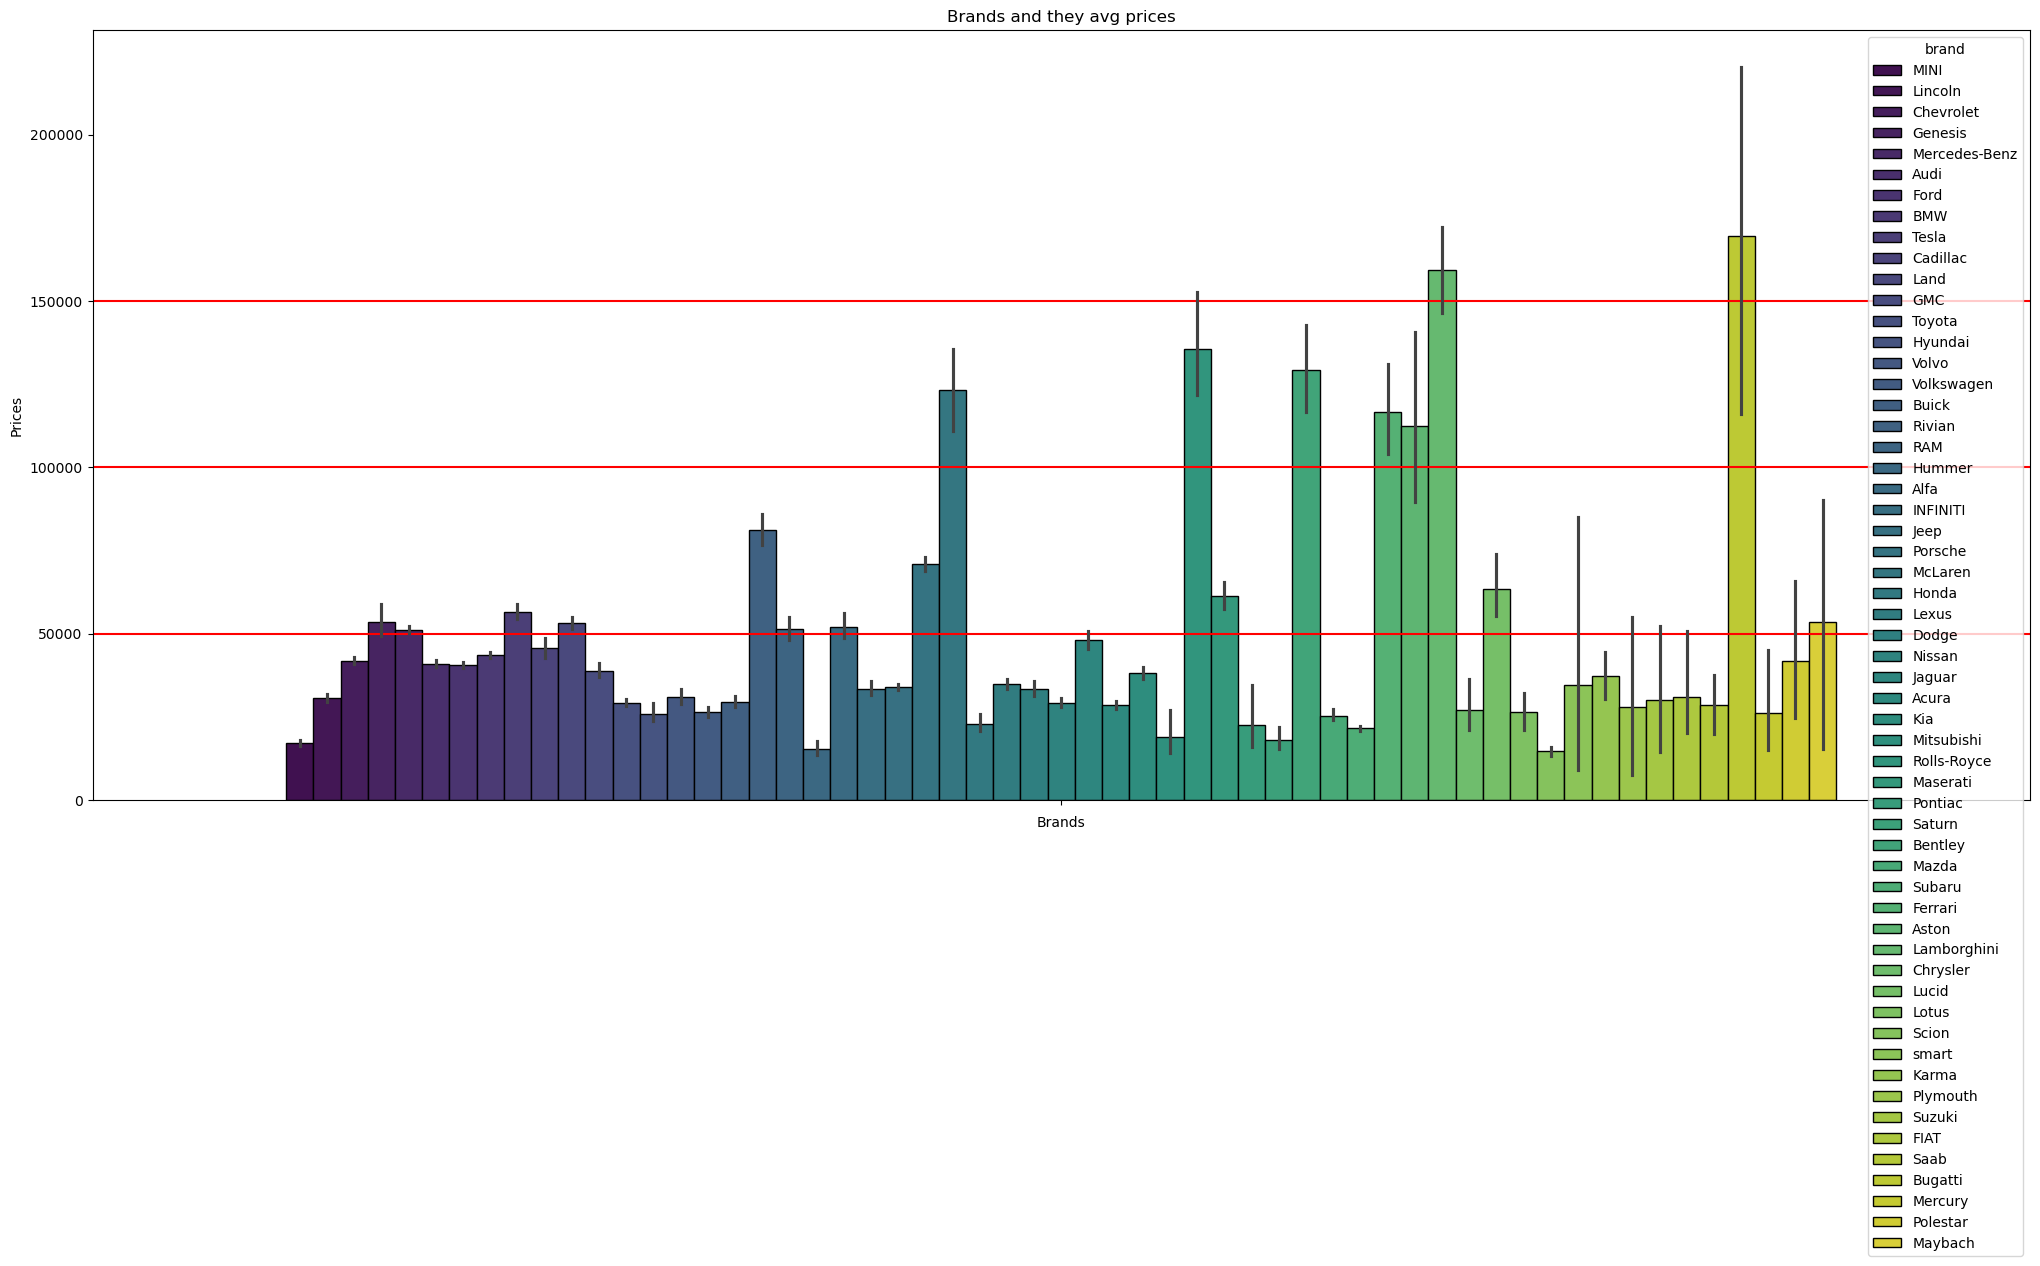

In [7]:
plt.figure(figsize=(25,10))

plt.title("Brands and they avg prices")

plt.xlabel("Brands")
plt.ylabel("Prices")

plt.axhline(y = 50000, color = 'r', linestyle = '-')
plt.axhline(y = 100000, color = 'r', linestyle = '-')
plt.axhline(y = 150000, color = 'r', linestyle = '-')

sns.barplot(train_dataframe,hue = "brand",y = "price",palette='viridis',edgecolor='black')
plt.show()

<Figure size 1000x600 with 0 Axes>

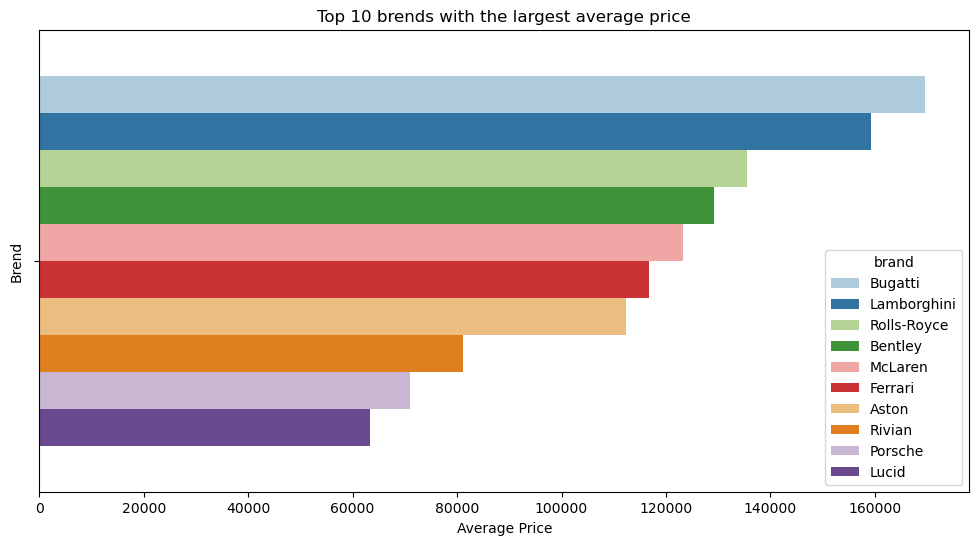

In [8]:
plt.figure(figsize=(10, 6))
mean_price_per_brand = train_dataframe.groupby('brand')['price'].mean().reset_index()

top_10_brands = mean_price_per_brand.nlargest(10, 'price')


plt.figure(figsize=(12, 6))
sns.barplot(hue='brand', x='price', data=top_10_brands, palette="Paired",legend=True)

plt.xlabel('Average Price')
plt.ylabel('Brend')
plt.title('Top 10 brends with the largest average price')
plt.show()

/tmp/ipykernel_16257/2216487753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand', data=train_dataframe, palette='Spectral', edgecolor='black')


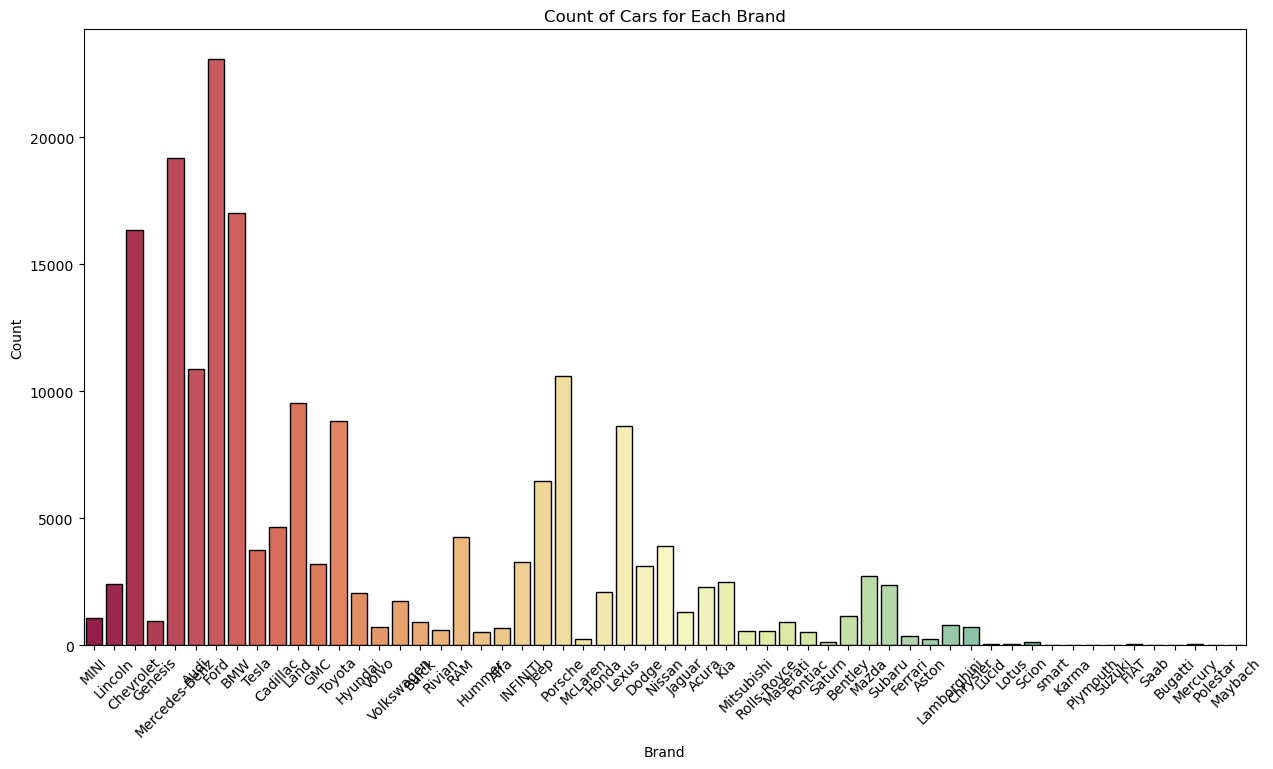

In [9]:
plt.figure(figsize=(15, 8))
plt.title("Count of Cars for Each Brand")
sns.countplot(x='brand', data=train_dataframe, palette='Spectral', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_16257/2052336243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='brand', y='price', data=train_dataframe, palette='coolwarm')


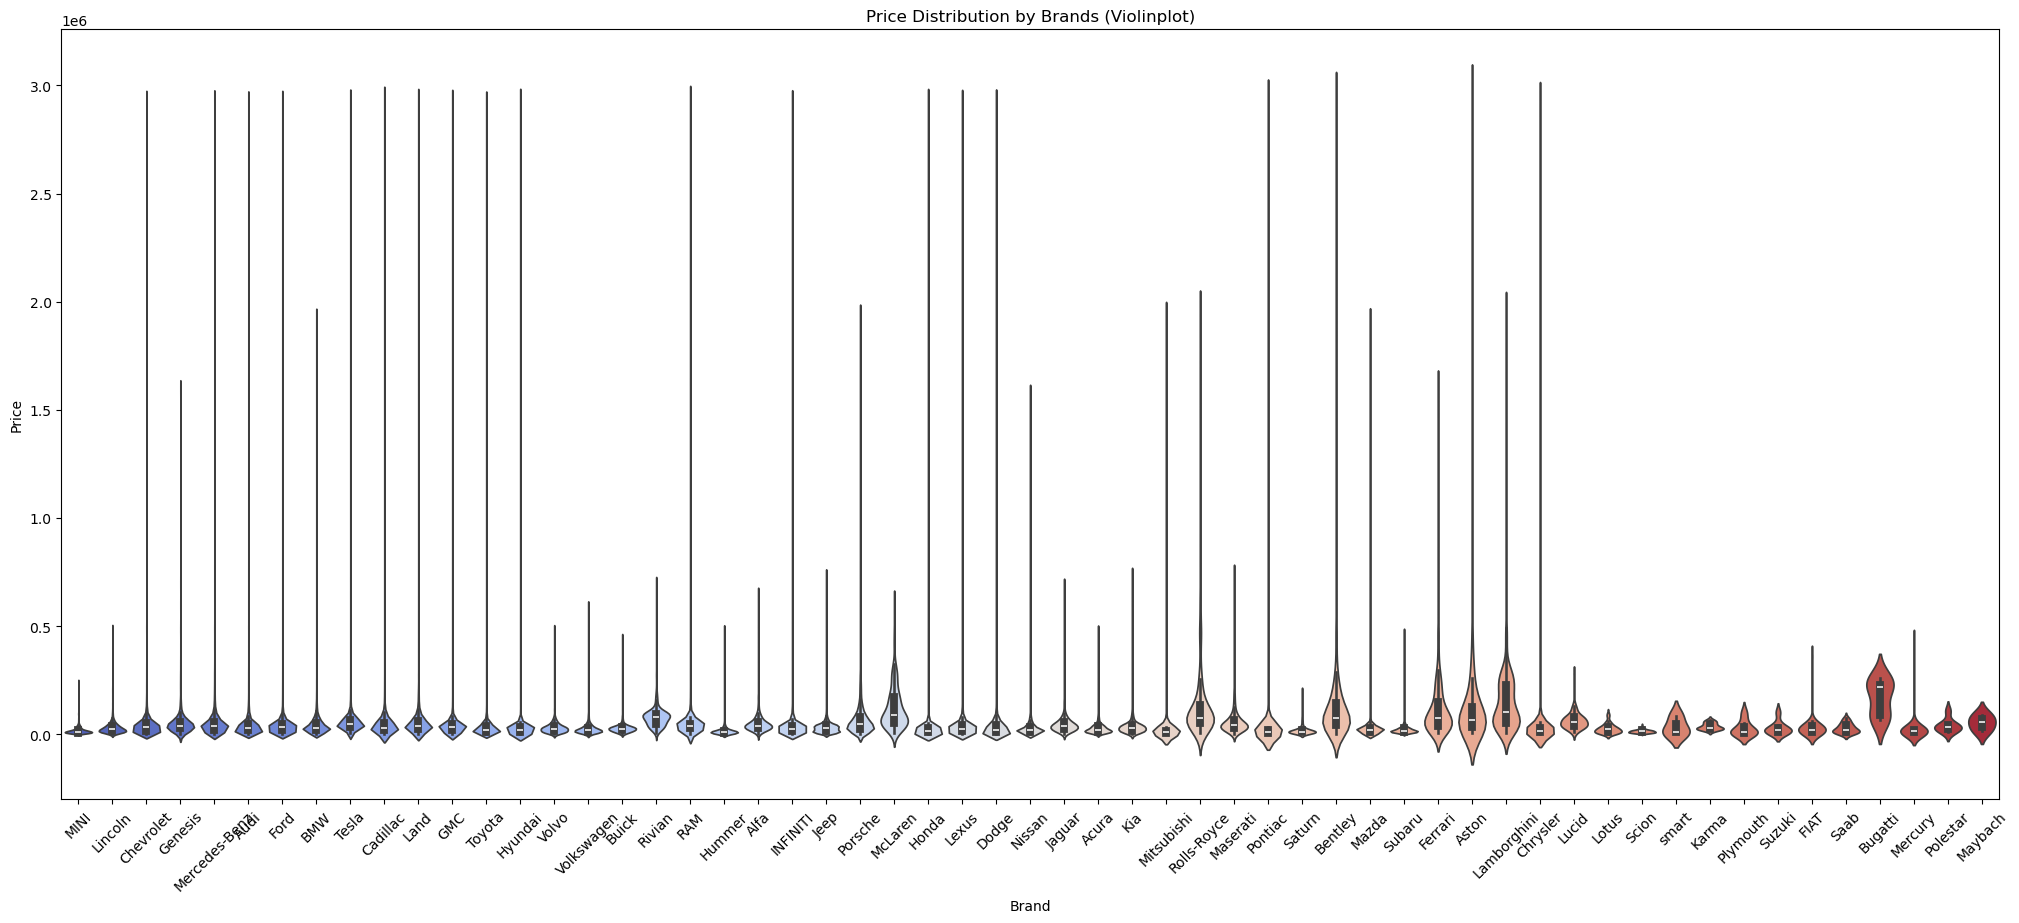

In [10]:
plt.figure(figsize=(25, 10))
plt.title("Price Distribution by Brands (Violinplot)")
sns.violinplot(x='brand', y='price', data=train_dataframe, palette='coolwarm')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_16257/564215135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='brand', y='price', data=train_dataframe, palette='Set1')


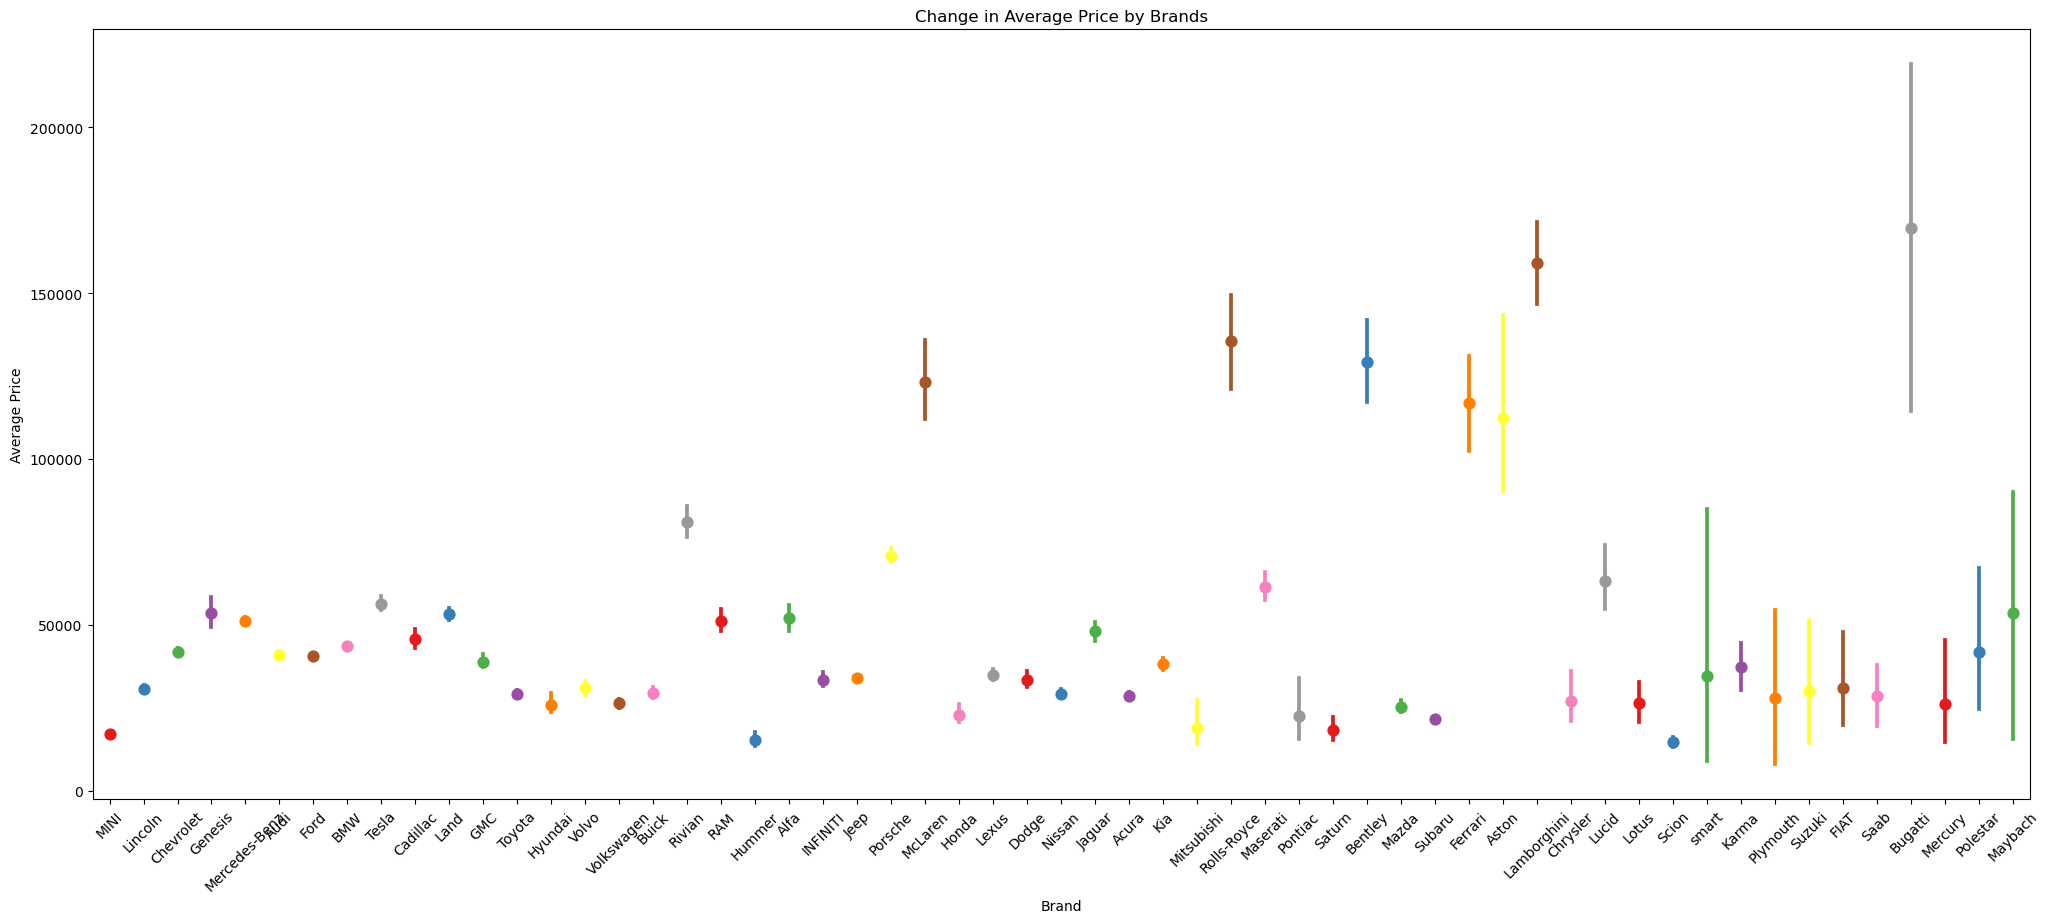

In [11]:
plt.figure(figsize=(25,10))
plt.title("Change in Average Price by Brands")
sns.pointplot(x='brand', y='price', data=train_dataframe, palette='Set1')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


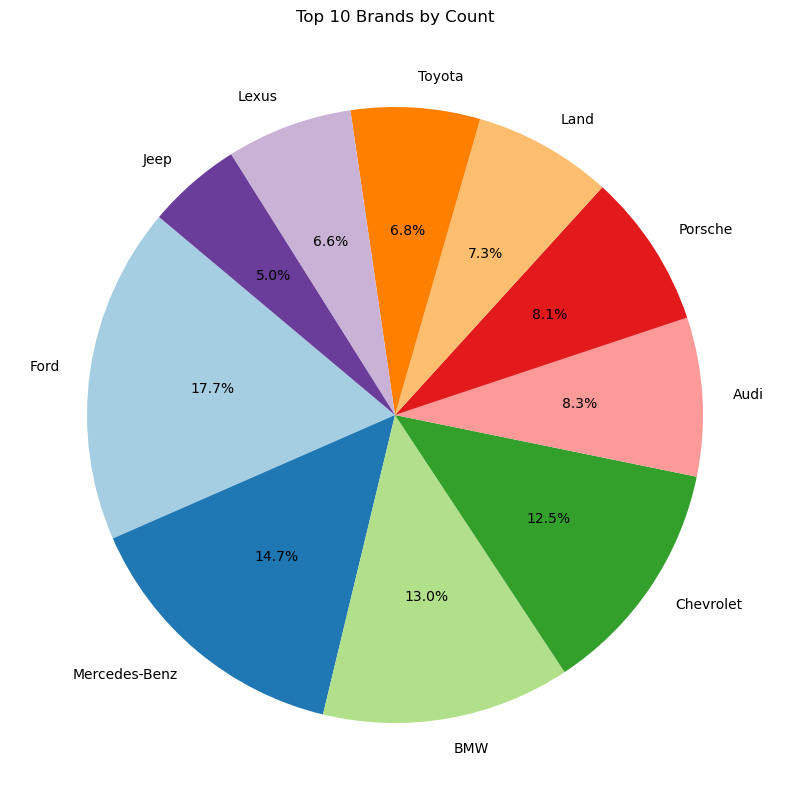

In [13]:
top_10_brands = train_dataframe['brand'].value_counts().nlargest(10)

plt.figure(figsize=(10, 10))
plt.title("Top 10 Brands by Count")
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Paired'))
plt.show()

## Year

In [14]:
null_model_year = train_dataframe['model_year'].isnull().sum()
print(f'Null values in model_year: {null_model_year}')

# Describe basic statistics
model_year_stats = train_dataframe['model_year'].describe()
print(f'Model Year Statistics:\n{model_year_stats}')


Null values in model_year: 0
Model Year Statistics:
count    188533.000000
mean       2015.829998
std           5.660967
min        1974.000000
25%        2013.000000
50%        2017.000000
75%        2020.000000
max        2024.000000
Name: model_year, dtype: float64


/tmp/ipykernel_7411/311175376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_dataframe['model_year'].value_counts().index,


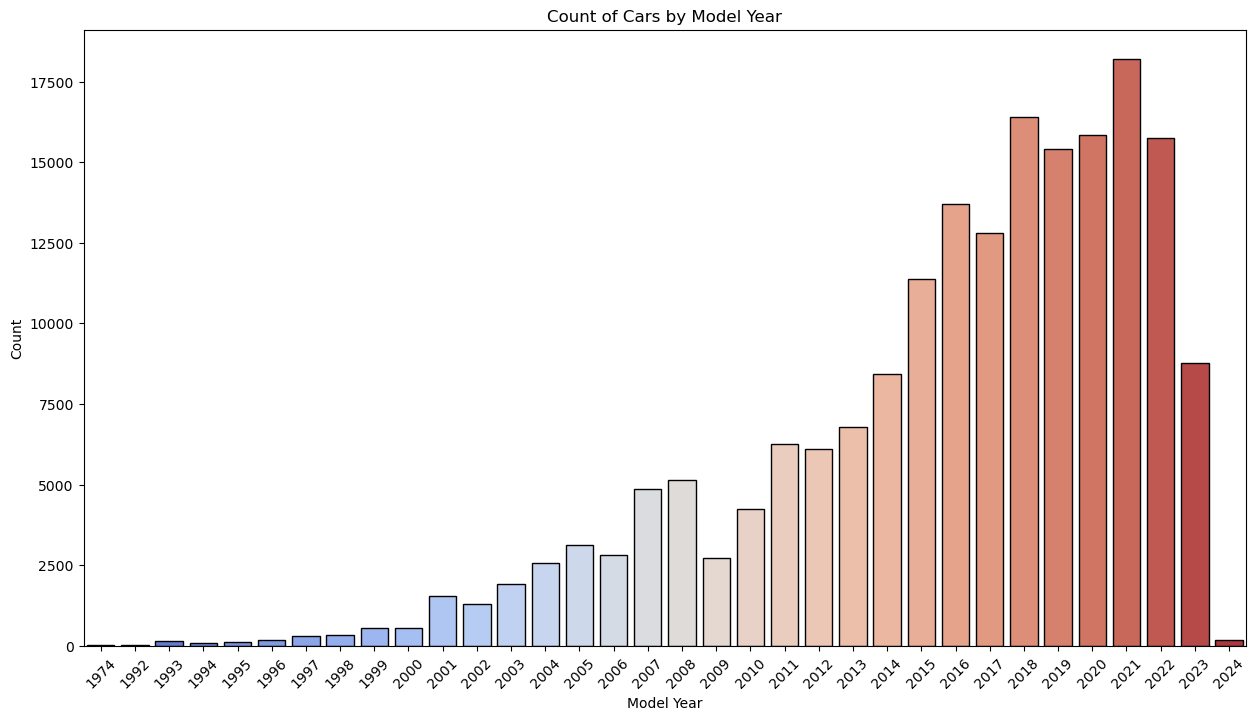

In [15]:
plt.figure(figsize=(15, 8))
plt.title("Count of Cars by Model Year")
sns.barplot(x=train_dataframe['model_year'].value_counts().index, 
            y=train_dataframe['model_year'].value_counts().values, 
            palette='coolwarm', edgecolor='black')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


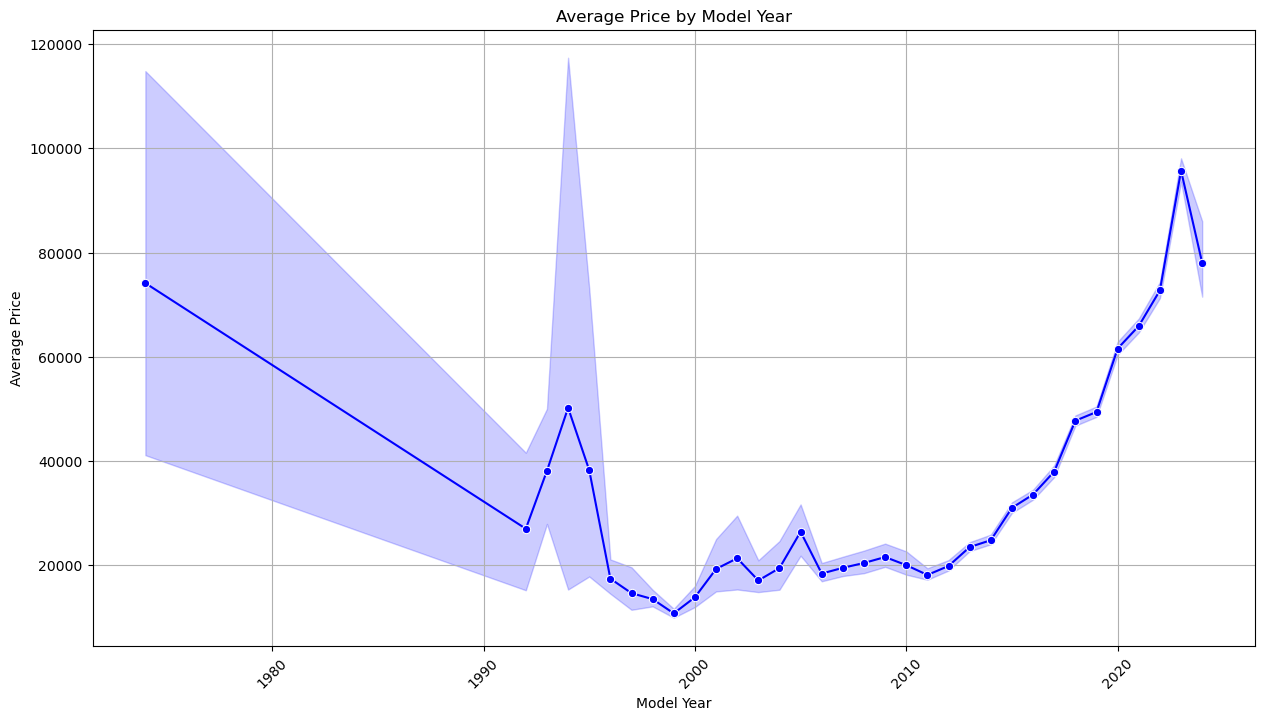

In [16]:
plt.figure(figsize=(15, 8))
plt.title("Average Price by Model Year")
sns.lineplot(x='model_year', y='price', data=train_dataframe, marker='o', color='b')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_7411/2104173660.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_year', y='price', data=train_dataframe, palette='Set2')


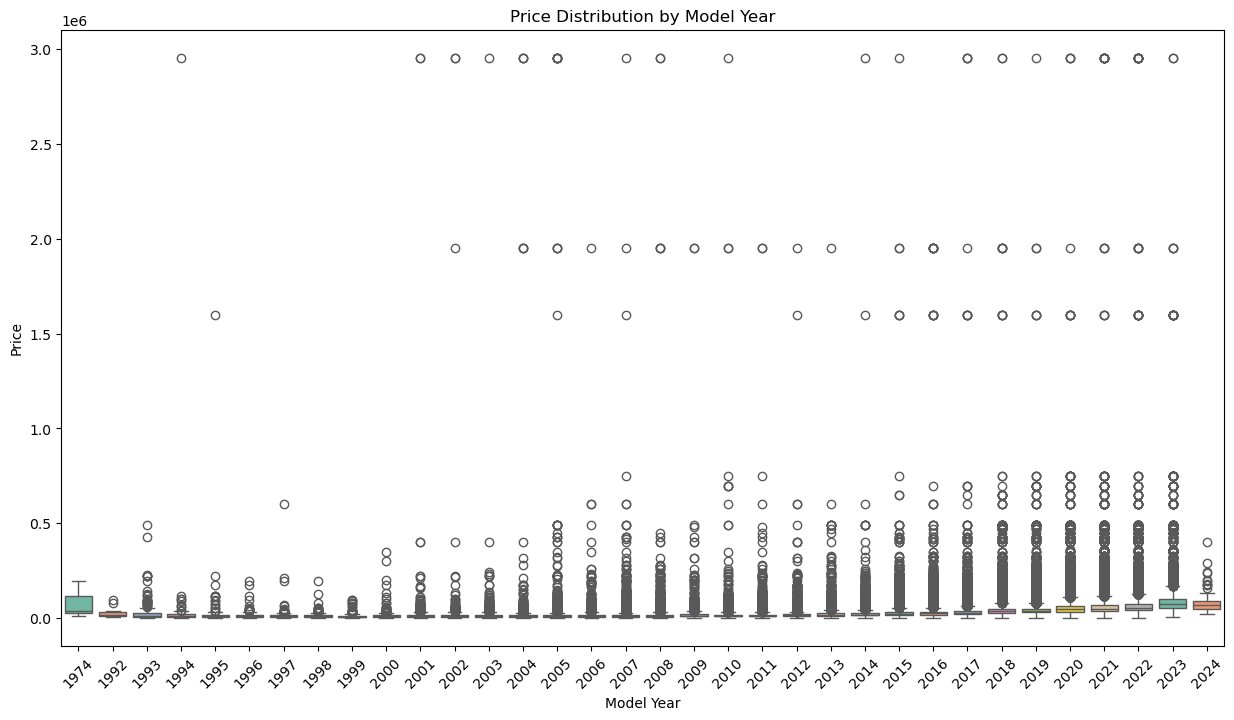

In [17]:
plt.figure(figsize=(15, 8))
plt.title("Price Distribution by Model Year")
sns.boxplot(x='model_year', y='price', data=train_dataframe, palette='Set2')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


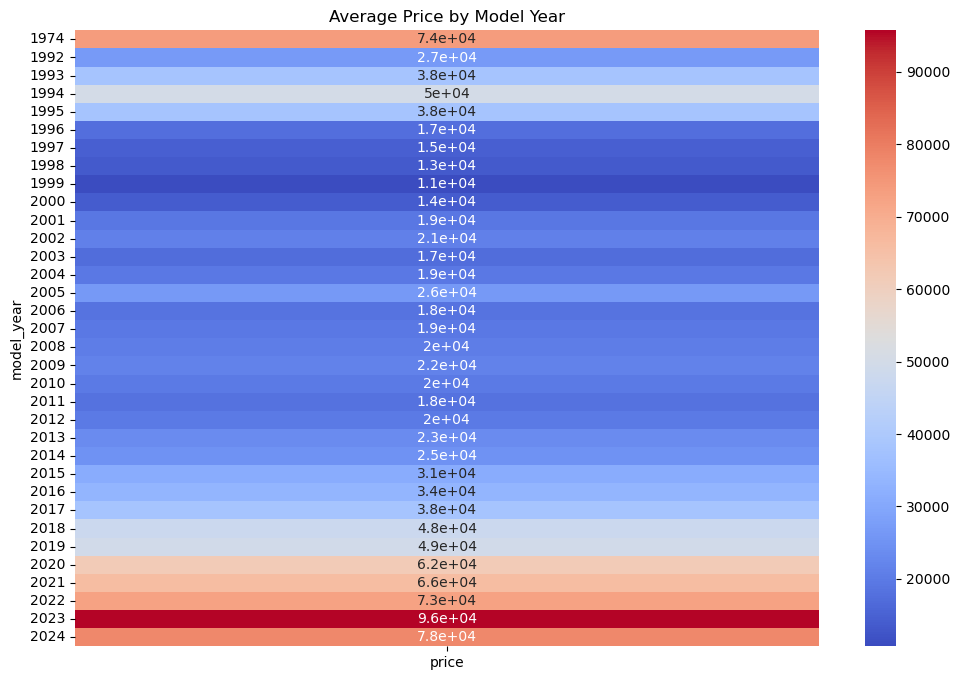

In [18]:
model_year_price_pivot = train_dataframe.pivot_table(index='model_year', values='price', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(model_year_price_pivot, annot=True, cmap='coolwarm')
plt.title("Average Price by Model Year")
plt.show()


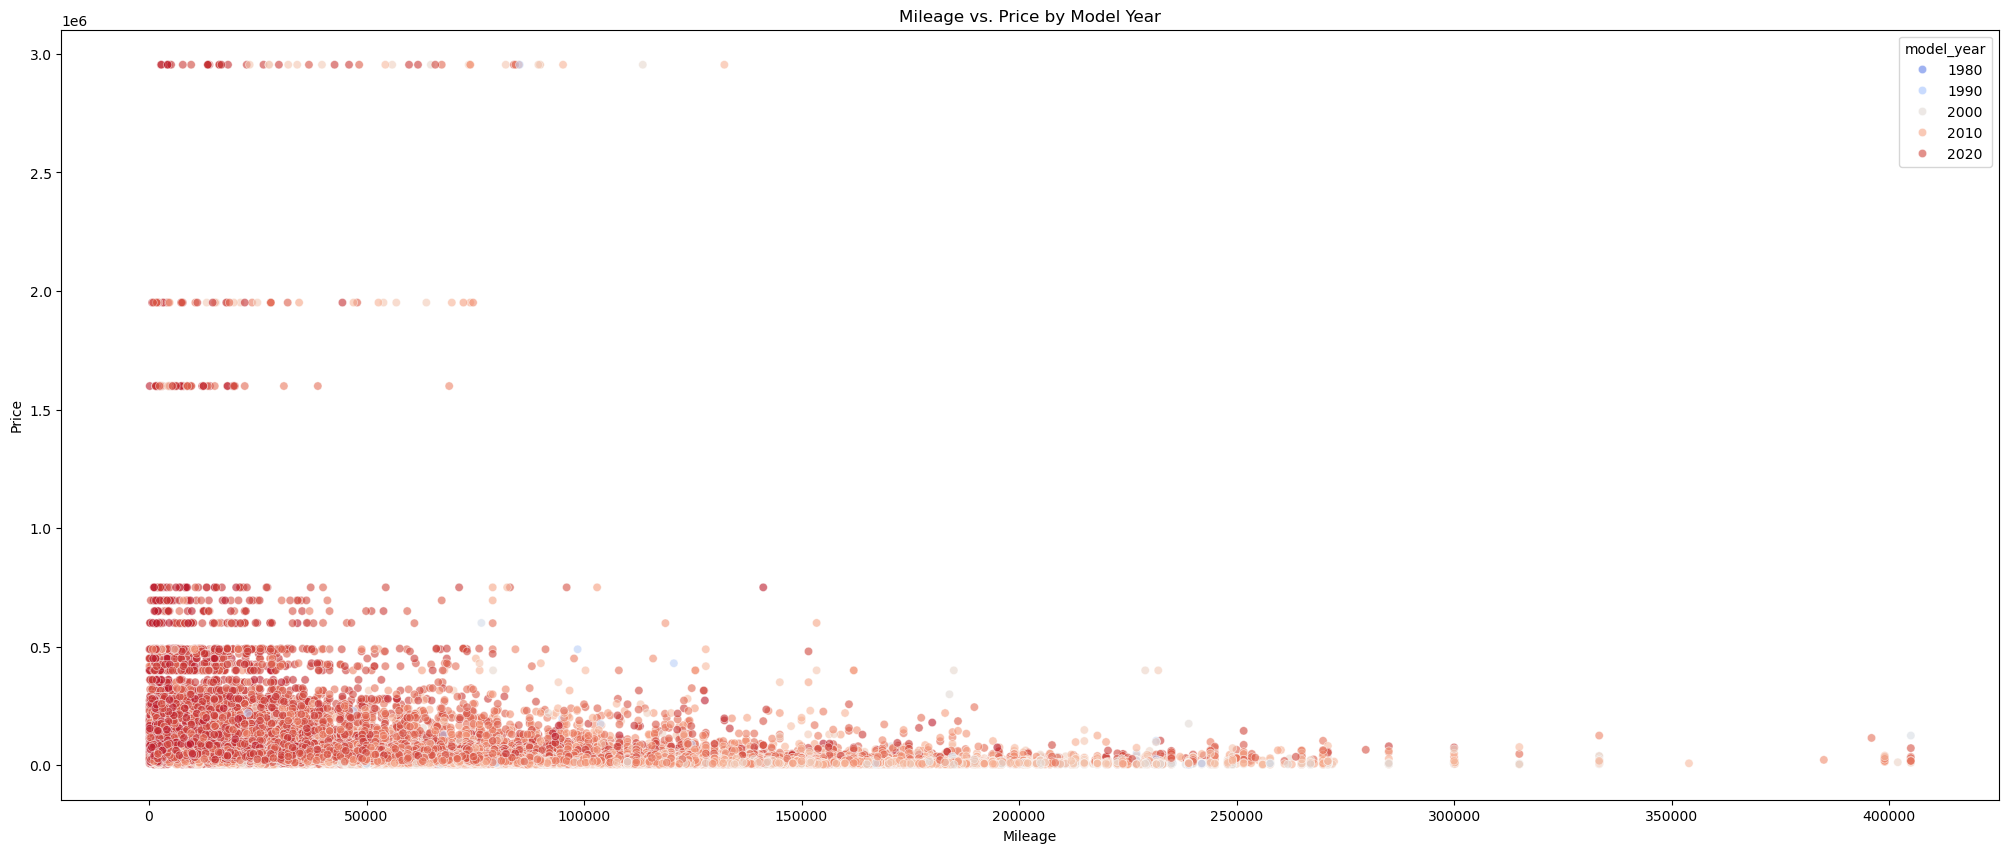

In [19]:
plt.figure(figsize=(25, 10))
plt.title("Mileage vs. Price by Model Year")
sns.scatterplot(x='milage', y='price', hue='model_year', data=train_dataframe, palette='coolwarm', alpha=0.6)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


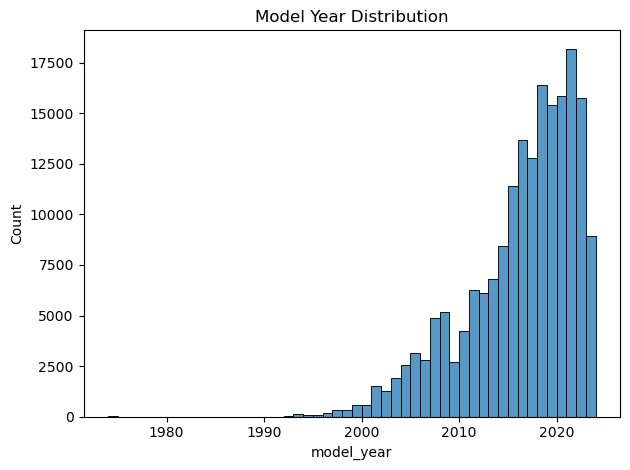

In [20]:

sns.histplot(train_dataframe['model_year'], bins=50, kde=False)
plt.title('Model Year Distribution')

plt.tight_layout()
plt.show()

## Milleage

In [21]:
null_mileage = train_dataframe['milage'].isnull().sum()
print(f'Null values in milage: {null_mileage}')


mileage_stats = train_dataframe['milage'].describe()
print(f'Mileage Statistics:\n{mileage_stats}')

Null values in milage: 0
Mileage Statistics:
count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64


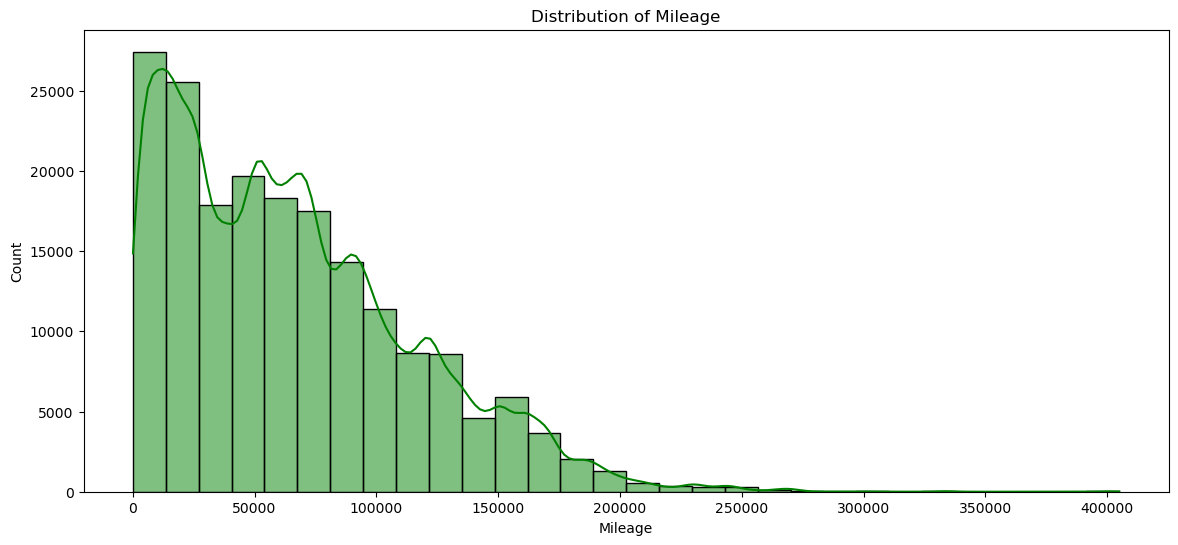

In [22]:
plt.figure(figsize=(14, 6))
sns.histplot(train_dataframe['milage'], bins=30, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

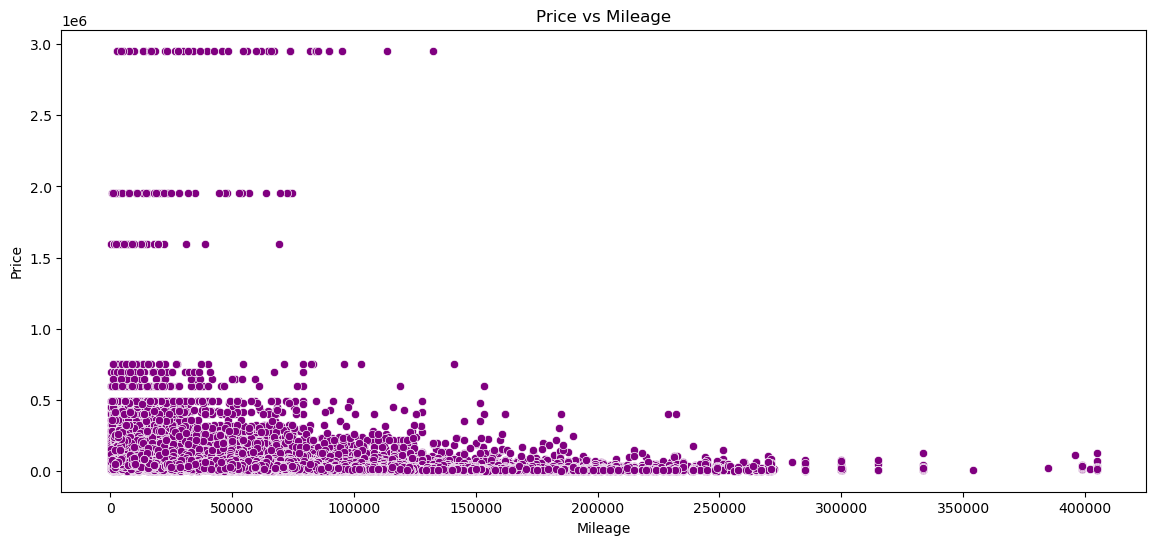

In [23]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='milage', y='price', data=train_dataframe, color='purple')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

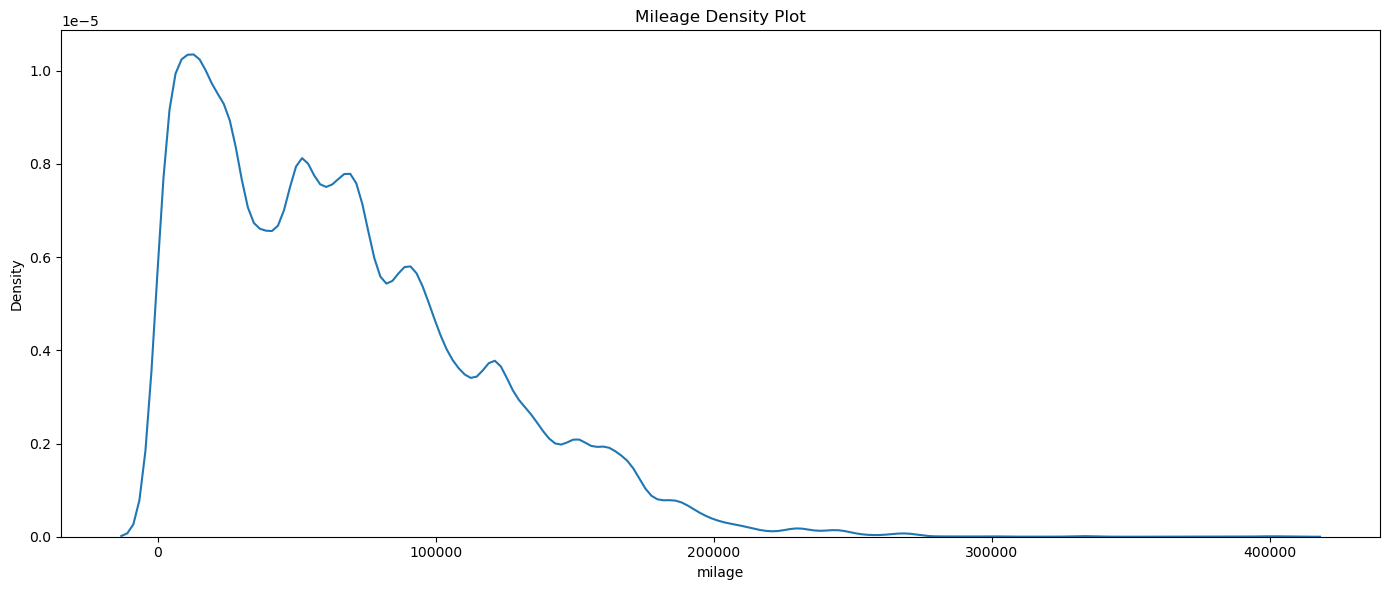

In [24]:
plt.figure(figsize=(14, 6))
sns.kdeplot(train_dataframe['milage'])
plt.title('Mileage Density Plot')
plt.tight_layout()
plt.show()

## Fuel Type

In [25]:
null_fuel_type = train_dataframe['fuel_type'].isnull().sum()
print(f'Null values in fuel_type: {null_fuel_type}')

fuel_type_counts = train_dataframe['fuel_type'].value_counts()
print(f'Fuel Type Counts:\n{fuel_type_counts}')

Null values in fuel_type: 5083
Fuel Type Counts:
fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64


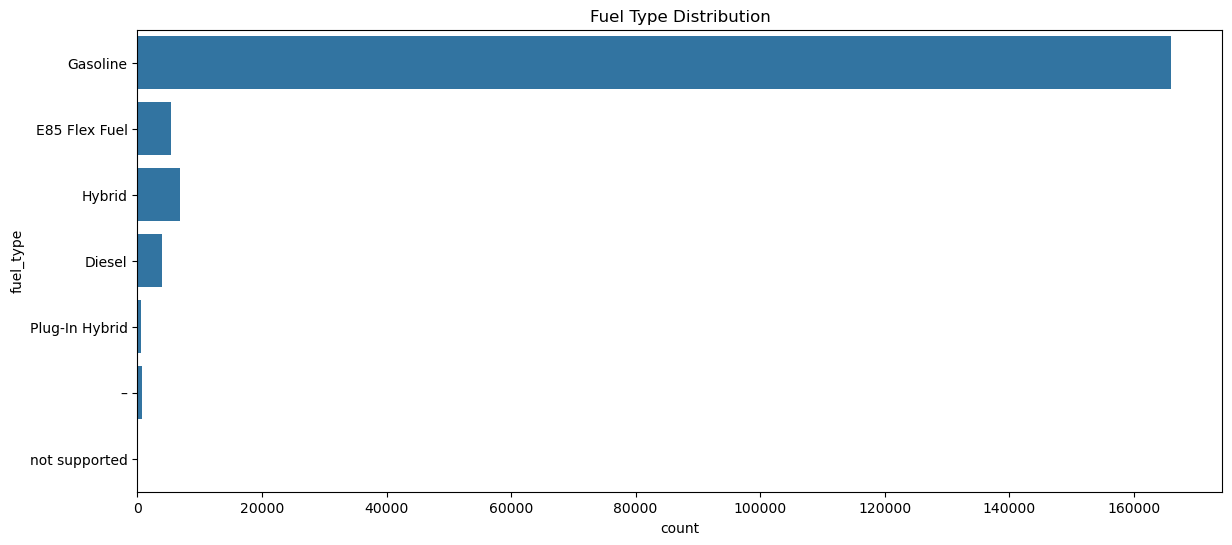

In [26]:
plt.figure(figsize=(14, 6))
sns.countplot(y='fuel_type', data=train_dataframe)
plt.title('Fuel Type Distribution')
plt.show()

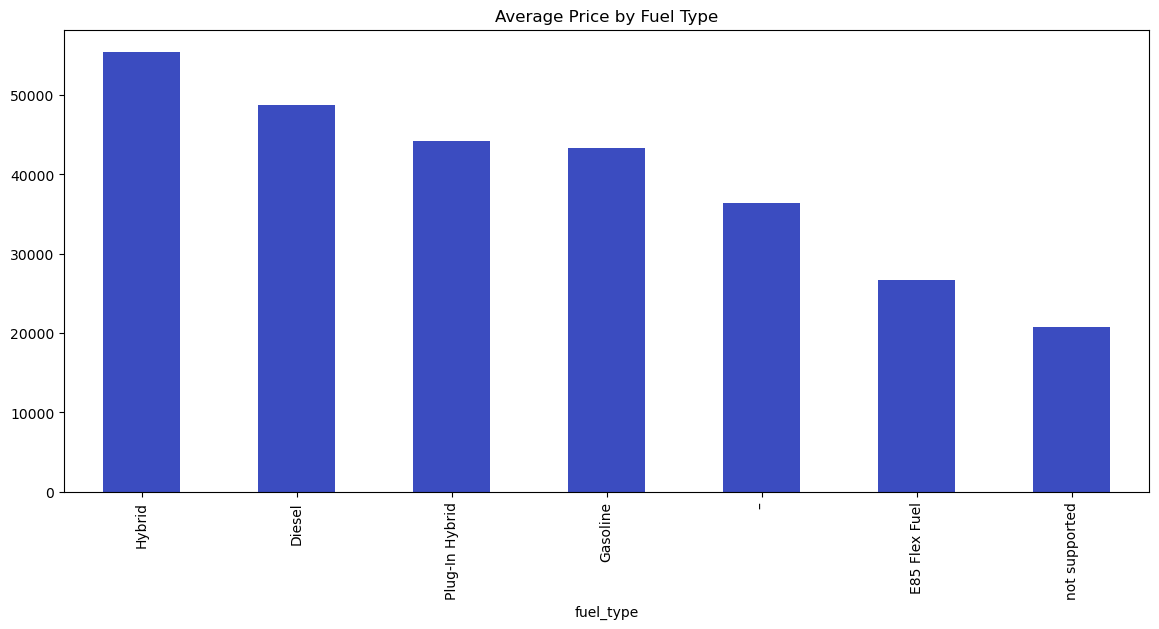

In [43]:
plt.figure(figsize=(14, 6))
avg_price_fuel = train_dataframe.groupby('fuel_type')['price'].mean().sort_values(ascending=False)
avg_price_fuel.plot(kind='bar', colormap='coolwarm')
plt.title('Average Price by Fuel Type')
plt.show()

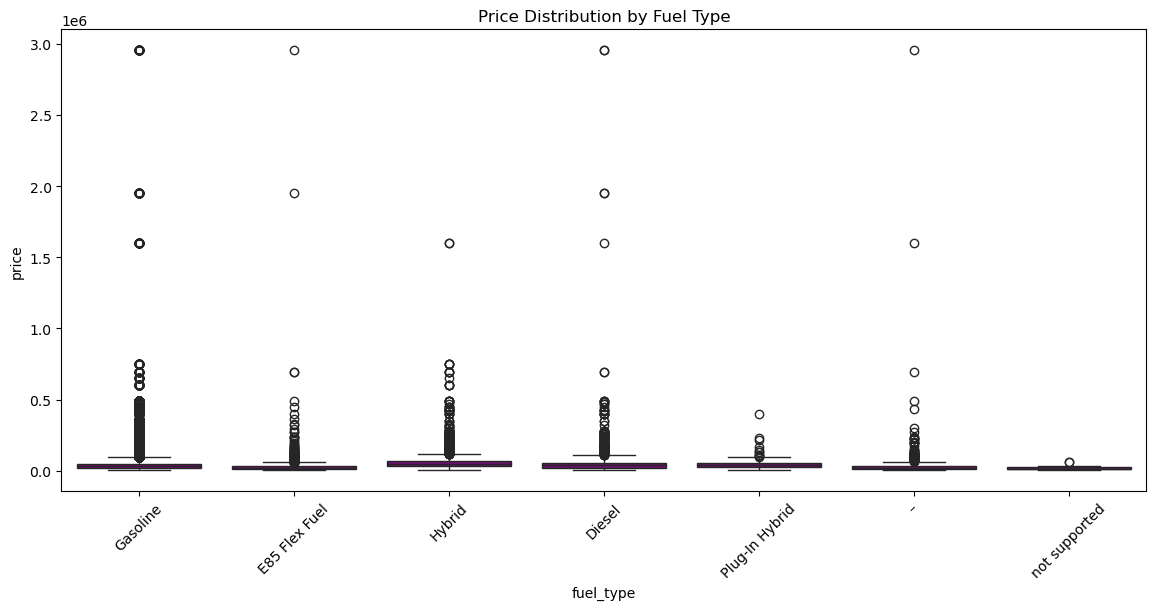

In [44]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='fuel_type', y='price', data=train_dataframe, color='purple')
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.show()

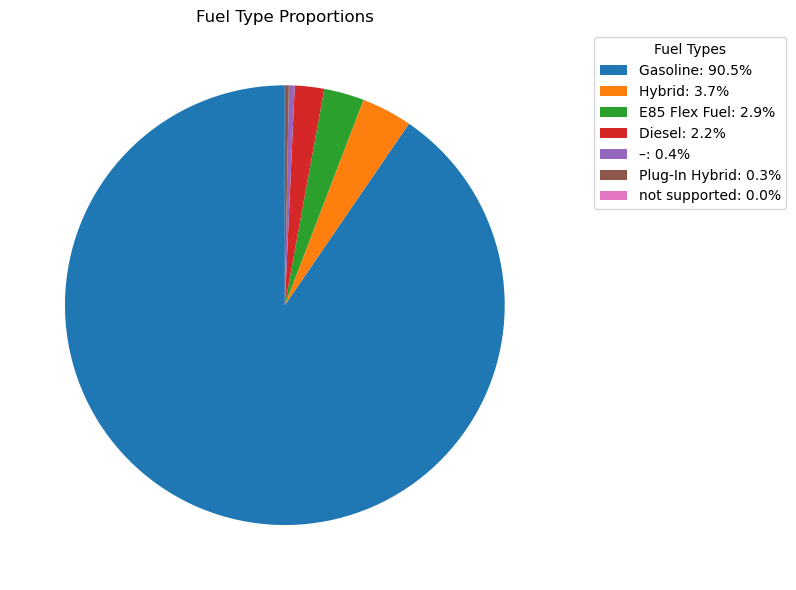

In [29]:
fuel_type_counts = train_dataframe['fuel_type'].value_counts()
explode = [0.1 if count < 5 else 0 for count in fuel_type_counts]  

plt.figure(figsize=(14, 6))
wedges, texts = plt.pie(fuel_type_counts, explode=explode, pctdistance=0.85, startangle=90)

percentages = 100 * fuel_type_counts / fuel_type_counts.sum()

labels_with_percents = [f'{label}: {percent:.1f}%' for label, percent in zip(fuel_type_counts.index, percentages)]

plt.legend(wedges, labels_with_percents, title="Fuel Types", bbox_to_anchor=(1.05, 1), loc="best")

plt.title('Fuel Type Proportions')
plt.tight_layout()
plt.show()

## Engine

In [30]:
null_engine = train_dataframe['engine'].isnull().sum()
print(f'Null values in engine: {null_engine}')

top_engines = train_dataframe['engine'].value_counts().nlargest(10)
print(f'Top 10 engine types:\n{top_engines}')

Null values in engine: 0
Top 10 engine types:
engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2841
2.0L I4 16V GDI DOHC Turbo                               2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            2451
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            2436
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2187
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             2138
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2134
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2084
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Engine Types by Count')

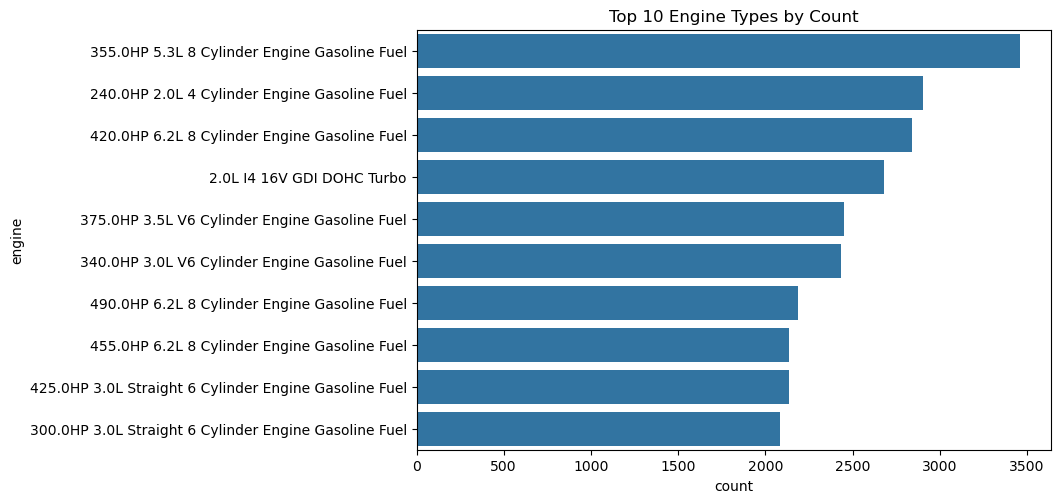

In [31]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.countplot(y='engine', data=train_dataframe, order=top_engines.index)
plt.title('Top 10 Engine Types by Count')
plt.show()

[]

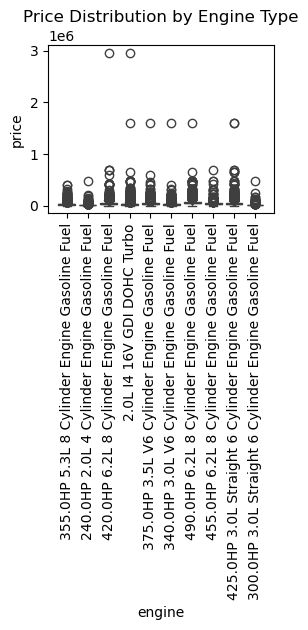

In [45]:
plt.subplot(2, 2, 2)
sns.boxplot(x='engine', y='price', data=train_dataframe, order=top_engines.index)
plt.title('Price Distribution by Engine Type')
plt.xticks(rotation=90)
plt.plot()

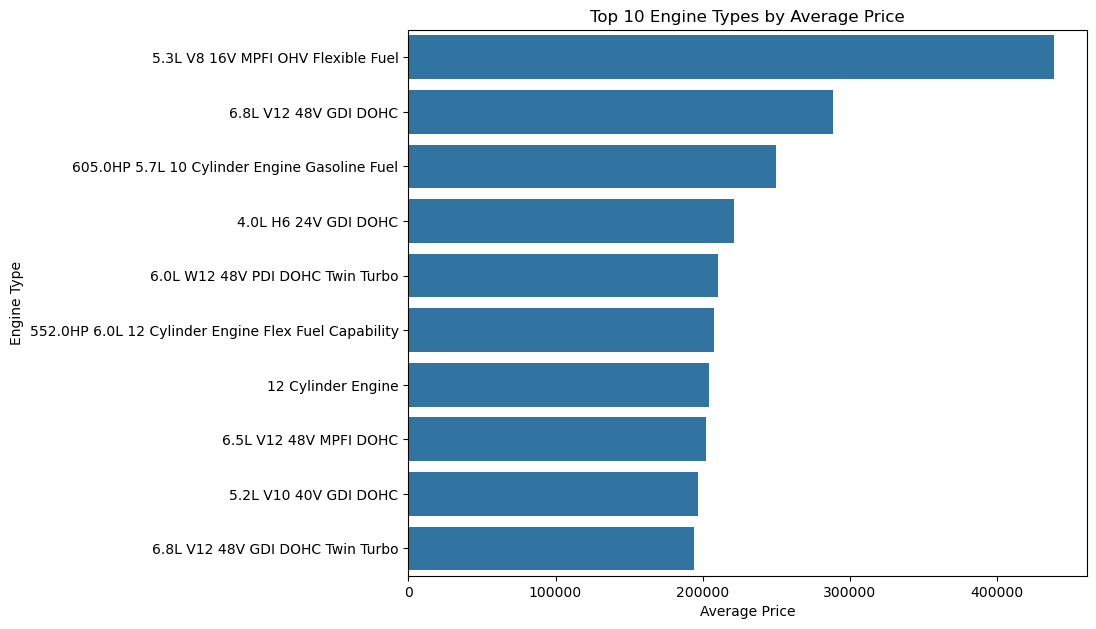

In [46]:
engine_price_avg = train_dataframe.groupby('engine')['price'].mean().nlargest(10)

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
sns.barplot(y=engine_price_avg.index, x=engine_price_avg.values)
plt.title('Top 10 Engine Types by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Engine Type')

plt.tight_layout()
plt.show()

## Transmission

In [47]:
null_transmission = train_dataframe['transmission'].isnull().sum()
print(f'Null values in transmission: {null_transmission}')


transmission_counts = train_dataframe['transmission'].value_counts()
print(f'Transmission Counts:\n{transmission_counts}')

Null values in transmission: 0
Transmission Counts:
transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                  

In [48]:
train_dataframe["transmission"].describe()

count     188533
unique        52
top          A/T
freq       49904
Name: transmission, dtype: object

Text(0.5, 1.0, 'Average Price by Transmission Type')

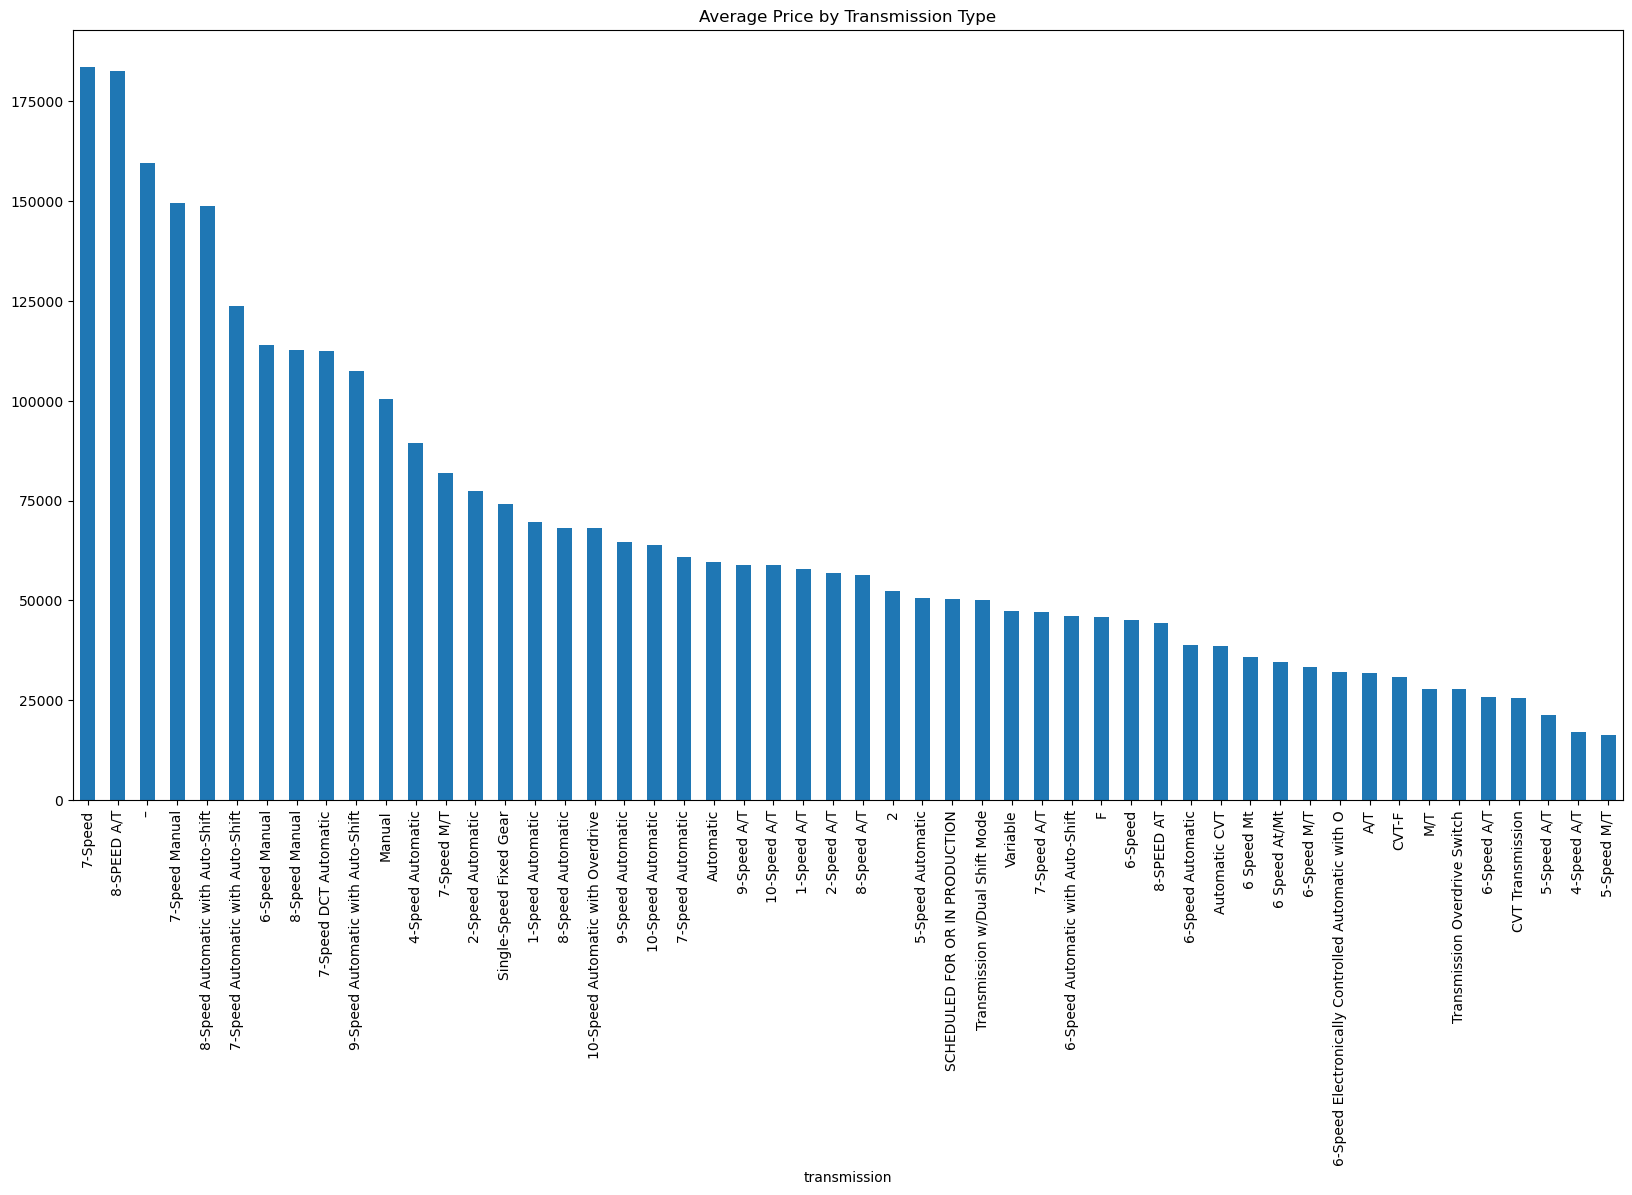

In [51]:
plt.figure(figsize=(20,10))

avg_price_transmission.plot(kind='bar')
plt.title('Average Price by Transmission Type')


Text(0.5, 1.0, 'Transmission Frequency')

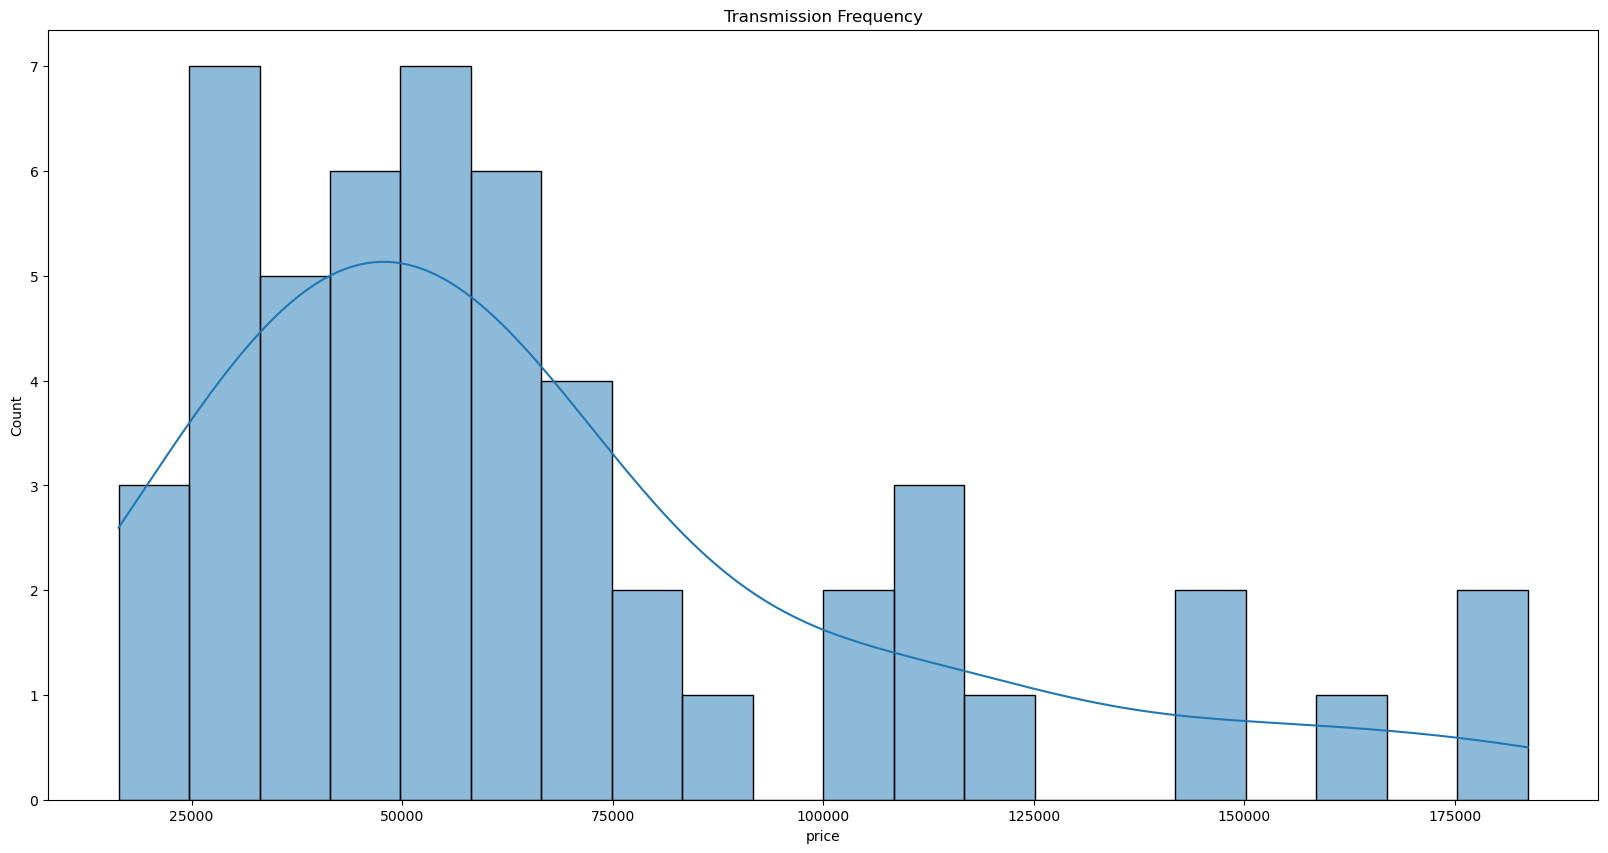

In [58]:
plt.figure(figsize=(20,10))
sns.histplot(avg_price_transmission, bins=20, kde=True)
plt.title('Transmission Frequency')

## Exterior Color

In [12]:
null_ext_col = train_dataframe['ext_col'].isnull().sum()
print(f'Null values in ext_col: {null_ext_col}')

top_ext_colors = train_dataframe['ext_col'].value_counts().nlargest(10)
print(f'Top 10 exterior colors:\n{top_ext_colors}')

Null values in ext_col: 0
Top 10 exterior colors:
ext_col
Black     48658
White     43815
Gray      25293
Silver    16995
Blue      14555
Red        9901
Green      2698
Gold       1668
Brown      1162
Orange     1139
Name: count, dtype: int64


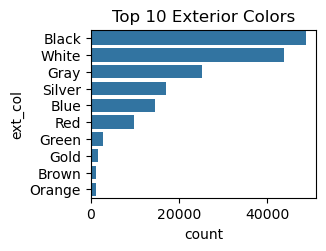

In [23]:
plt.subplot(2, 2, 1)
sns.countplot(y='ext_col', data=train_dataframe, order=top_ext_colors.index)
plt.title('Top 10 Exterior Colors')
plt.show()

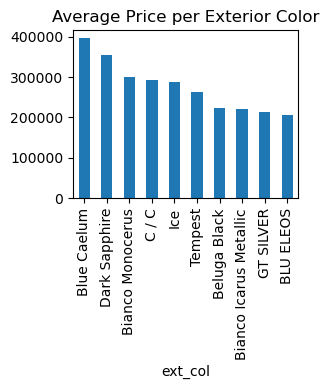

In [20]:
plt.subplot(2, 2, 3)
avg_price_ext_color = train_dataframe.groupby('ext_col')['price'].mean().sort_values(ascending=False).nlargest(10)
avg_price_ext_color.plot(kind='bar')
plt.title('Average Price per Exterior Color')
plt.show()

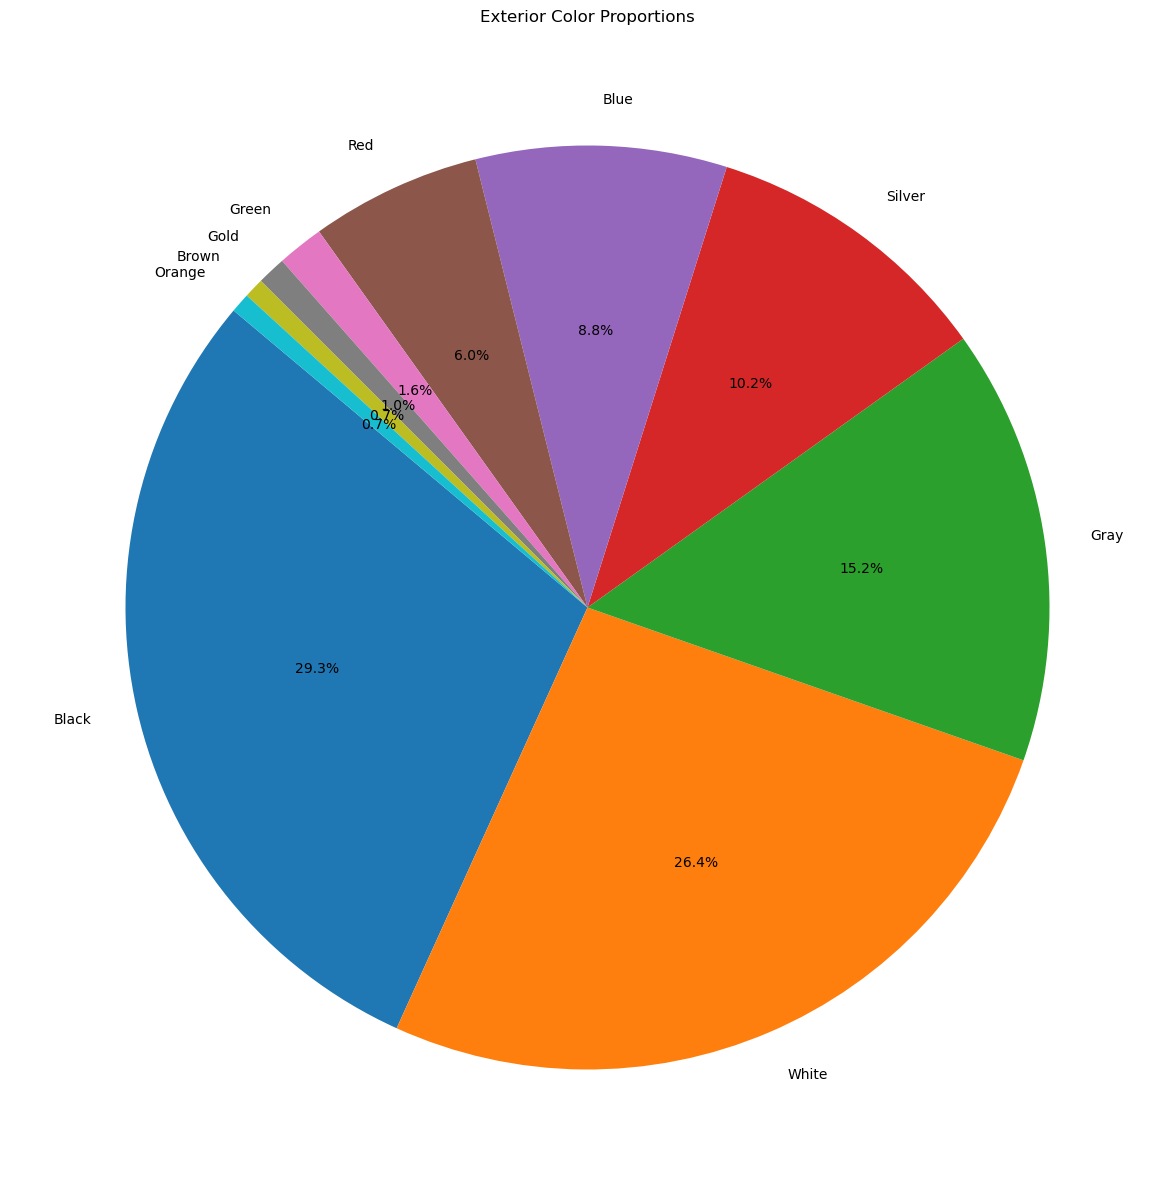

In [32]:
plt.figure(figsize=(20, 15))
plt.pie(top_ext_colors, labels=top_ext_colors.index, autopct='%1.1f%%', startangle=140)
plt.title('Exterior Color Proportions')
plt.show()

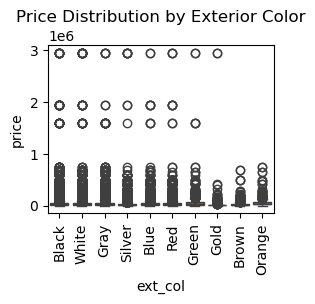

In [33]:
plt.subplot(2, 2, 4)
sns.boxplot(x='ext_col', y='price', data=train_dataframe, order=top_ext_colors.index)
plt.title('Price Distribution by Exterior Color')
plt.xticks(rotation=90)
plt.show()

## Interior Color

In [41]:
null_int_col = train_dataframe['int_col'].isnull().sum()
print(f'Null values in int_col: {null_int_col}')


top_int_colors = train_dataframe['int_col'].value_counts().nlargest(10)
print(f'Top 10 interior colors:\n{top_int_colors}')

Null values in int_col: 0
Top 10 interior colors:
int_col
Black        107674
Beige         24495
Gray          21204
Brown          5810
Red            5145
White          4743
–              4527
Jet Black      2398
Ebony          1833
Orange          932
Name: count, dtype: int64


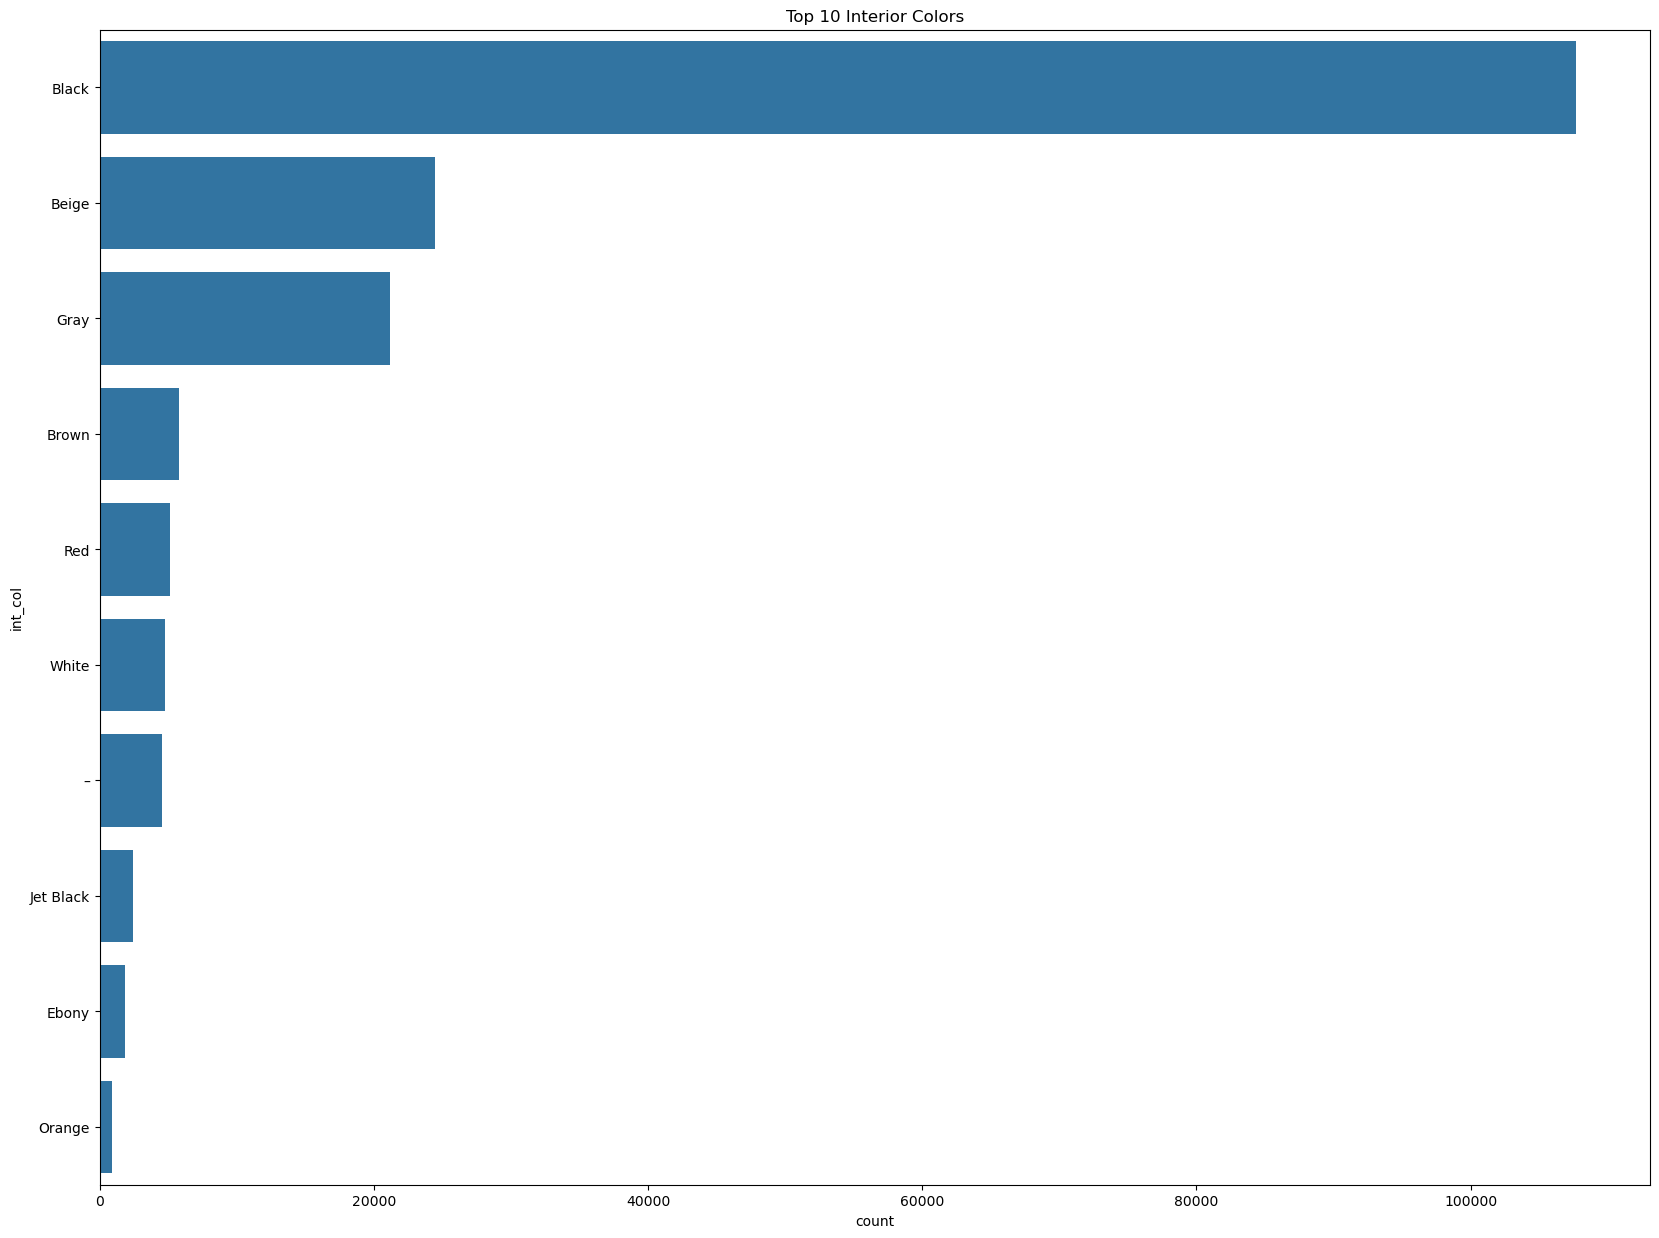

In [40]:
plt.figure(figsize=(20, 15))
sns.countplot(y='int_col', data=train_dataframe, order=top_int_colors.index)
plt.title('Top 10 Interior Colors')
plt.show()

Text(0.5, 1.0, 'Average Price per Interior Color')

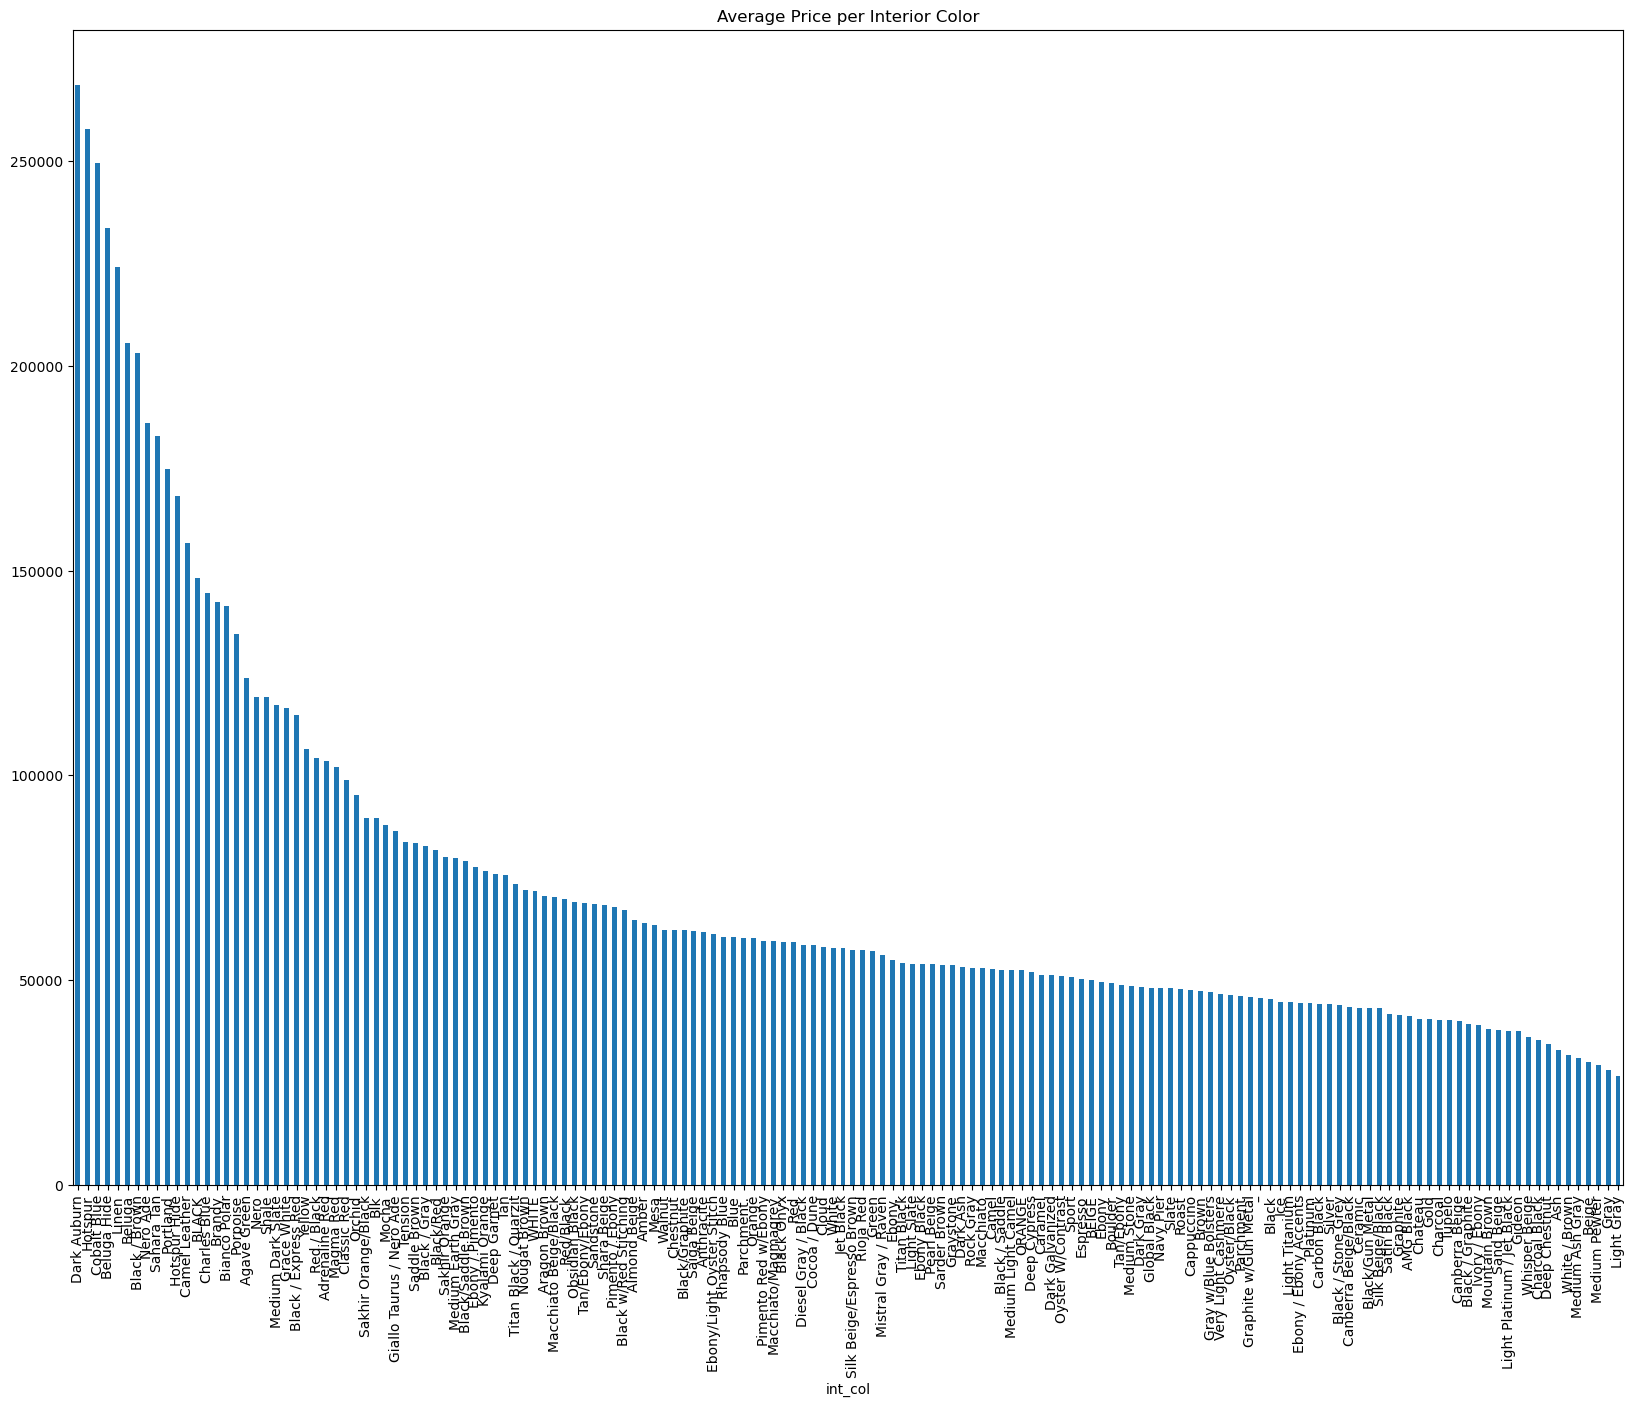

In [38]:
plt.figure(figsize=(20, 15))
avg_price_int_color = train_dataframe.groupby('int_col')['price'].mean().sort_values(ascending=False)
avg_price_int_color.plot(kind='bar')
plt.title('Average Price per Interior Color')
plt.show()

Text(0.5, 1.0, 'Interior Color Proportions')

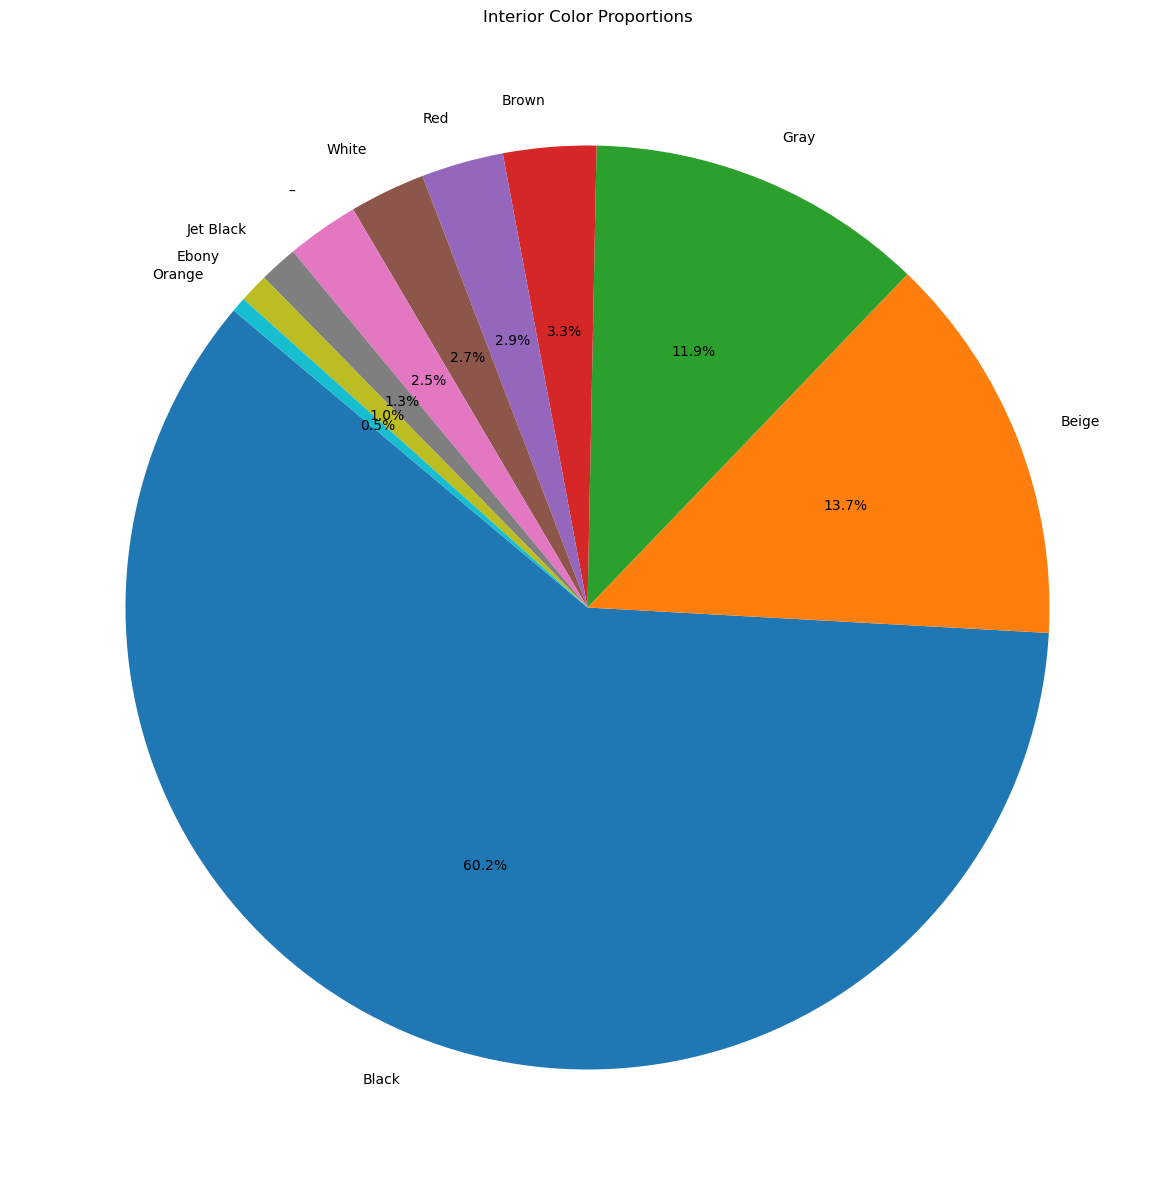

In [39]:
plt.figure(figsize=(20, 15))
plt.pie(top_int_colors, labels=top_int_colors.index, autopct='%1.1f%%', startangle=140)
plt.title('Interior Color Proportions')
plt.show()

## Accident 

In [51]:
null_accident = train_dataframe['accident'].isnull().sum()
print(f'Null values in accident: {null_accident}')


accident_counts = train_dataframe['accident'].value_counts()
print(f'Accident Counts:\n{accident_counts}')

Null values in accident: 2452
Accident Counts:
accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64


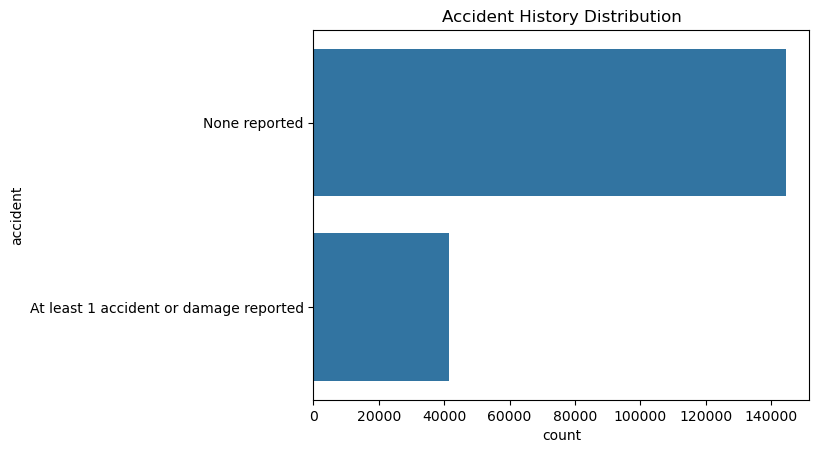

In [54]:
sns.countplot(y='accident', data=train_dataframe)
plt.title('Accident History Distribution')
plt.show()

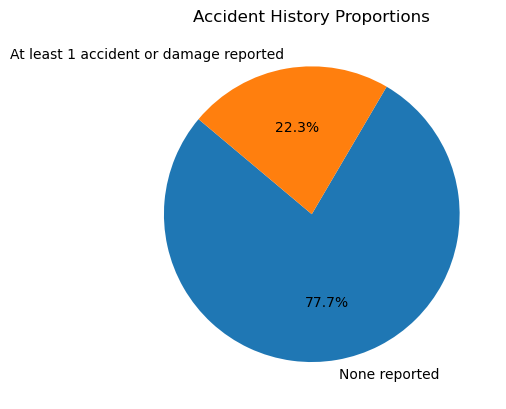

In [58]:
plt.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Accident History Proportions')
plt.show()

Text(0.5, 1.0, 'Price Distribution by Accident History')

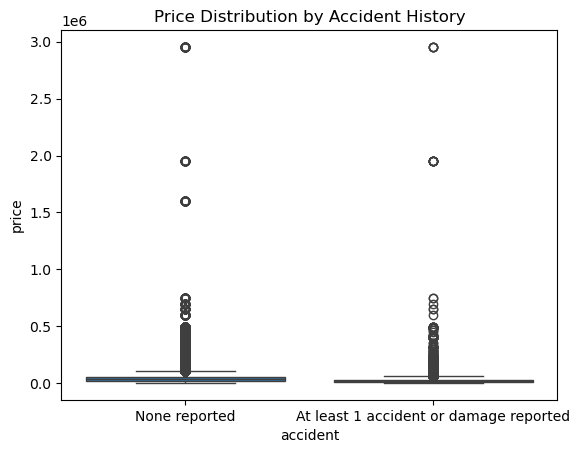

In [56]:
sns.boxplot(x='accident', y='price', data=train_dataframe)
plt.title('Price Distribution by Accident History')
plt.show()

Text(0.5, 1.0, 'Average Price with/without Accidents')

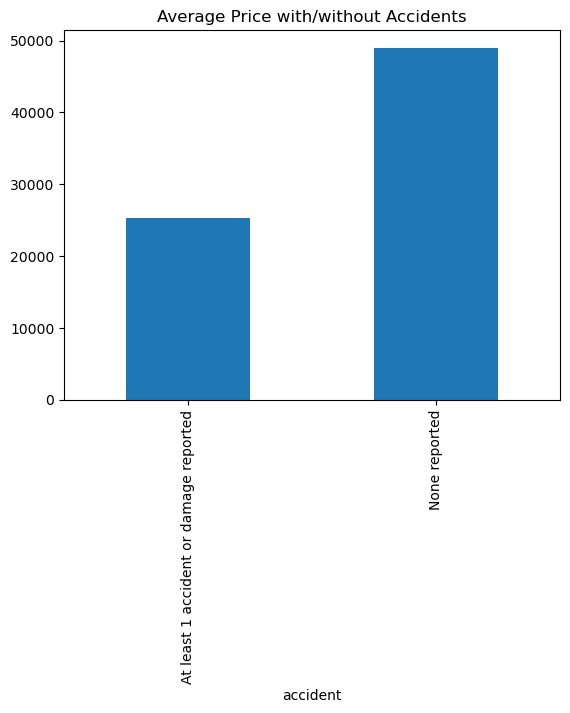

In [57]:
avg_price_accident = train_dataframe.groupby('accident')['price'].mean()
avg_price_accident.plot(kind='bar')
plt.title('Average Price with/without Accidents')
plt.show()

## Clean Title

In [65]:
null_clean_title = train_dataframe['clean_title'].isnull().sum()
print(f'Null values in clean_title: {null_clean_title}')

clean_title_counts = train_dataframe['clean_title'].value_counts()
print(f'Clean Title Counts:\n{clean_title_counts}')

Null values in clean_title: 21419
Clean Title Counts:
clean_title
Yes    167114
Name: count, dtype: int64


In [62]:
train_dataframe["clean_title"].describe()

count     167114
unique         1
top          Yes
freq      167114
Name: clean_title, dtype: object